### AWAL

In [2]:
import pandas as pd

# Load the Excel file
excel_file = pd.ExcelFile('BATUR_DIENG_2021.xlsx')  # Change the file name to your Excel file
excel_file_2 = pd.ExcelFile('BATUR_DIENG_2022.xlsx')  # Change the file name to your Excel file
excel_file_3 = pd.ExcelFile('BATUR_DIENG_2023.xlsx')  # Change the file name to your Excel file
# Get sheet names
sheet_names = excel_file.sheet_names
sheet_names_2 = excel_file_2.sheet_names
sheet_names_3 = excel_file_3.sheet_names

# Read each sheet into a DataFrame
data_frames = [excel_file.parse(sheet_name) for sheet_name in sheet_names]
data_frames_2 = [excel_file_2.parse(sheet_name) for sheet_name in sheet_names_2]
data_frames_3 = [excel_file_3.parse(sheet_name) for sheet_name in sheet_names_3]

# Combine DataFrames into a single DataFrame
combined_df = pd.concat(data_frames, ignore_index=True)
combined_df_2 = pd.concat(data_frames_2, ignore_index=True)
combined_df_3 = pd.concat(data_frames_3, ignore_index=True)

# Now, you can work with the combined_df DataFrame
# Store them in a list or tuple
dataframes = [combined_df, combined_df_2, combined_df_3]

# Concatenate them into a single DataFrame
df = pd.concat(dataframes, ignore_index=True)

# Drop columns with all NaN values
df = df.dropna(axis=1, how='all')

df['TANGGAL'] = pd.to_datetime(df['TANGGAL'])

df = df[df['TT AIR avg'] > 0]

df.set_index('TANGGAL')

FileNotFoundError: ignored

In [ ]:
df.to_csv('df_clean.csv', index=False)

### PLOT HOURLY, DAILY

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_csv("df_clean1.csv")
df2 = pd.read_csv("df_suhu_grass1.csv")
df3 = pd.read_csv('pws_arjuna.csv')
df4 = pd.read_csv('pws_sikidang.csv')

# Convert the 'date' column to datetime
df1['TIMESTAMP'] = pd.to_datetime(df1['date_time'])
df2['TIMESTAMP'] = pd.to_datetime(df2['TIMESTAMP'])
df3['TIMESTAMP'] = pd.to_datetime(df3['TIMESTAMP'])
df4['TIMESTAMP'] = pd.to_datetime(df4['TIMESTAMP'])

df1.set_index('TIMESTAMP', inplace=True)
df2.set_index('TIMESTAMP', inplace=True)
df3.set_index('TIMESTAMP', inplace=True)
df4.set_index('TIMESTAMP', inplace=True)

In [ ]:
df1

ID STASIUN         NAMA STA      LAT        LNG  \
TIMESTAMP                                                                   
2022-08-05 09:50:00+00:00    STA2285        AWS Batur -7.20399  109.91158   
2022-08-05 10:00:00+00:00    STA2285        AWS Batur -7.20399  109.91158   
2022-08-05 10:10:00+00:00    STA2285        AWS Batur -7.20399  109.91158   
2022-08-05 10:20:00+00:00    STA2285        AWS Batur -7.20399  109.91158   
2022-08-05 10:30:00+00:00    STA2285        AWS Batur -7.20399  109.91158   
...                              ...              ...      ...        ...   
2023-09-05 03:20:00+00:00    STA2285  AWS Batur Dieng -7.20399  109.91158   
2023-09-05 03:30:00+00:00    STA2285  AWS Batur Dieng -7.20399  109.91158   
2023-09-05 03:40:00+00:00    STA2285  AWS Batur Dieng -7.20399  109.91158   
2023-09-05 03:50:00+00:00    STA2285  AWS Batur Dieng -7.20399  109.91158   
2023-09-05 04:00:00+00:00    STA2285  AWS Batur Dieng -7.20399  109.91158   

                           ELEVASI                 TANGGAL   RR  WS AVG  \
TIMESTAMP                                                                 
2022-08-05 09:50:00+00:00   2078.0  2022-08-05 09:50:00+00  0.0   0.345   
2022-08-05 10:00:00+00:00   2078.0  2022-08-05 10:00:00+00  0.0   1.662   
2022-08-05 10:10:00+00:00   2078.0  2022-08-05 10:10:00+00  0.0   1.476   
2022-08-05 10:20:00+00:00   2078.0  2022-08-05 10:20:00+00  0.0   0.780   
2022-08-05 10:30:00+00:00   2078.0  2022-08-05 10:30:00+00  0.0   0.758   
...                            ...                     ...  ...     ...   
2023-09-05 03:20:00+00:00   2078.0  2023-09-05 03:20:00+00  0.0   3.793   
2023-09-05 03:30:00+00:00   2078.0  2023-09-05 03:30:00+00  0.0   3.289   
2023-09-05 03:40:00+00:00   2078.0  2023-09-05 03:40:00+00  0.0   3.021   
2023-09-05 03:50:00+00:00   2078.0  2023-09-05 03:50:00+00  0.0   3.133   
2023-09-05 04:00:00+00:00   2078.0  2023-09-05 04:00:00+00  0.0   3.600   

                           WS MAX  WD AVG  TT AIR MAX  TT AIR AVG  TT AIR MIN  \
TIMESTAMP                                                                       
2022-08-05 09:50:00+00:00   1.514   208.6       21.84       15.52       15.18   
2022-08-05 10:00:00+00:00   2.713   175.2       21.84       15.36       15.09   
2022-08-05 10:10:00+00:00   2.846   192.2       21.84       14.92       14.69   
2022-08-05 10:20:00+00:00   1.198   137.3       21.84       14.49       14.23   
2022-08-05 10:30:00+00:00   1.136   148.3       21.84       13.94       13.68   
...                           ...     ...         ...         ...         ...   
2023-09-05 03:20:00+00:00   5.633   300.6       19.22       17.87       14.16   
2023-09-05 03:30:00+00:00   5.380   207.1       19.22       17.57       14.16   
2023-09-05 03:40:00+00:00   5.009   155.8       19.22       16.96       14.16   
2023-09-05 03:50:00+00:00   4.908   313.5       19.22       17.82       14.16   
2023-09-05 04:00:00+00:00   5.519   219.1       19.22       17.63       14.16   

                           RH AVG    PP AIR   SR AVG  SR MAX  PH SEA  \
TIMESTAMP                                                              
2022-08-05 09:50:00+00:00   86.90  796.2658    84.70   249.7     NaN   
2022-08-05 10:00:00+00:00   86.90  796.3821    74.56   249.7     NaN   
2022-08-05 10:10:00+00:00   89.70  796.3670    44.77   249.7     NaN   
2022-08-05 10:20:00+00:00   90.10  796.3774    22.31   249.7     NaN   
2022-08-05 10:30:00+00:00   91.00  796.4604    10.80   249.7     NaN   
...                           ...       ...      ...     ...     ...   
2023-09-05 03:20:00+00:00   73.06  797.3772  1005.00  1138.0     NaN   
2023-09-05 03:30:00+00:00   73.64  797.3764   703.30  1138.0     NaN   
2023-09-05 03:40:00+00:00   75.19  797.3763   588.70  1200.0     NaN   
2023-09-05 03:50:00+00:00   72.75  797.3602   875.00  1234.0     NaN   
2023-09-05 04:00:00+00:00   73.58  797.3338  1087.00  1234.0     NaN   

                                           date_time  
TI

<Axes: xlabel='TIMESTAMP'>

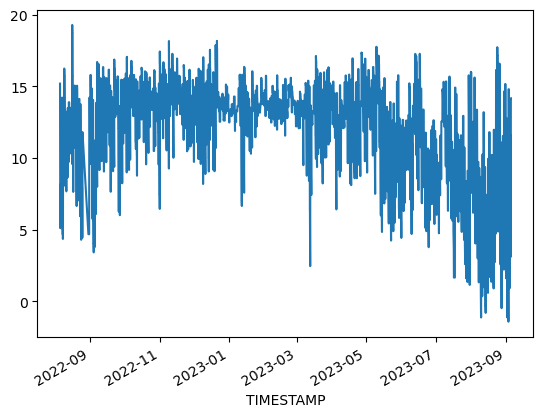

In [ ]:
df1['TT AIR MIN'].plot()

<Axes: >

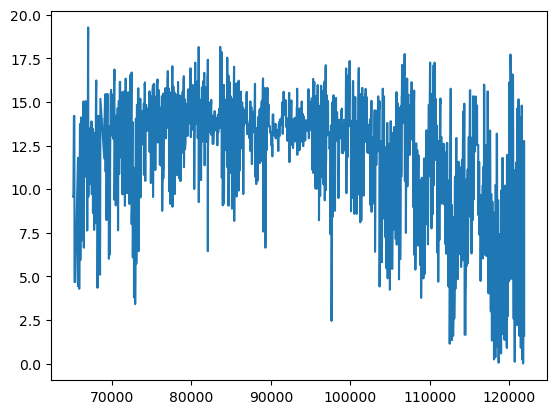

In [ ]:
df['TT AIR MIN'].plot()

In [ ]:
df1_tmin = df1[['TT AIR MIN']].resample('H').min()
df2_tmin = df2[['TS_Min_T107']].resample('H').min()
df3_tmin = df3[['AirTC']].resample('H').min()
df4_tmin = df4[['Temp_Avg']].resample('H').min()
df5_tmin = df2[['TA_Min_T107']].resample('H').min()


In [ ]:
# Select a specific time range (e.g., from '2023-01-03' to '2023-01-07')
# Define the range of dates and hours
start_datetime = '2023-08-25 00:00:00'
end_datetime = '2023-09-29 04:00:00'
df1_tmin_1 = df1_tmin[start_datetime:end_datetime]
df2_tmin_1 = df2_tmin[start_datetime:end_datetime]


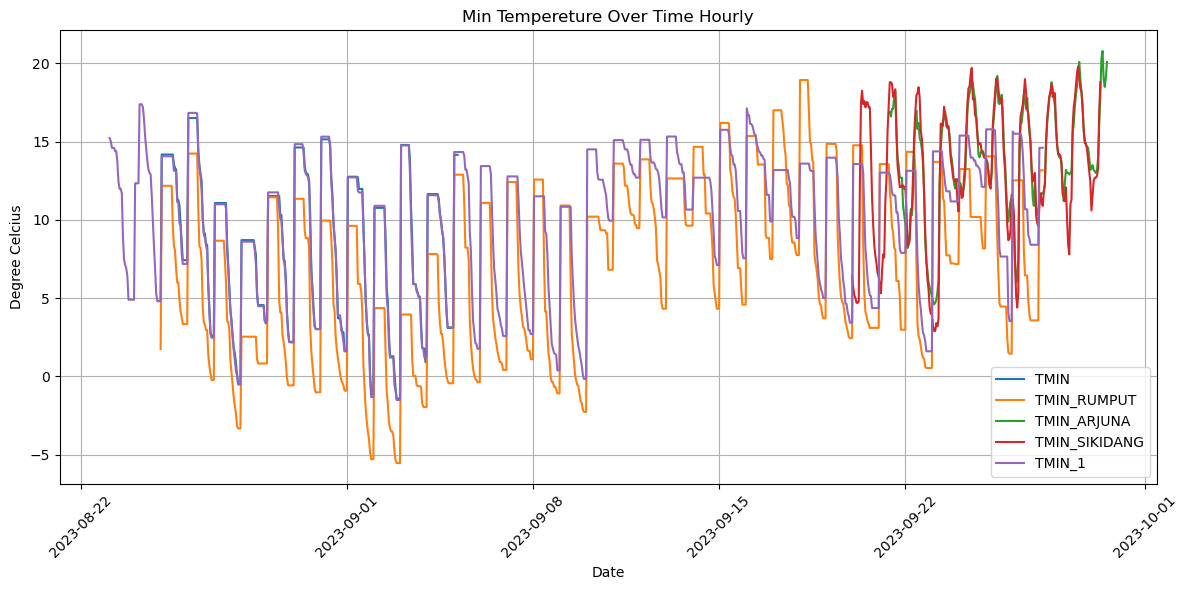

In [ ]:
# Create a figure
plt.figure(figsize=(12, 6))
# Plot the DataFrame, including the index
plt.plot(df1_tmin_1.index, df1_tmin_1['TT AIR MIN'], label='TMIN')
plt.plot(df2_tmin_1.index, df2_tmin_1['TS_Min_T107'], label='TMIN_RUMPUT')
plt.plot(df3_tmin.index, df3_tmin['AirTC'], label='TMIN_ARJUNA')
plt.plot(df4_tmin.index, df4_tmin['Temp_Avg'], label='TMIN_SIKIDANG')
plt.plot(df5_tmin.index, df5_tmin['TA_Min_T107'], label='TMIN_1')


# Customize the plot
plt.title('Min Tempereture Over Time Hourly')
plt.xlabel('Date')
plt.ylabel('Degree Celcius')
plt.grid(True)
plt.legend()

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure all elements fit within the figure area
plt.show()

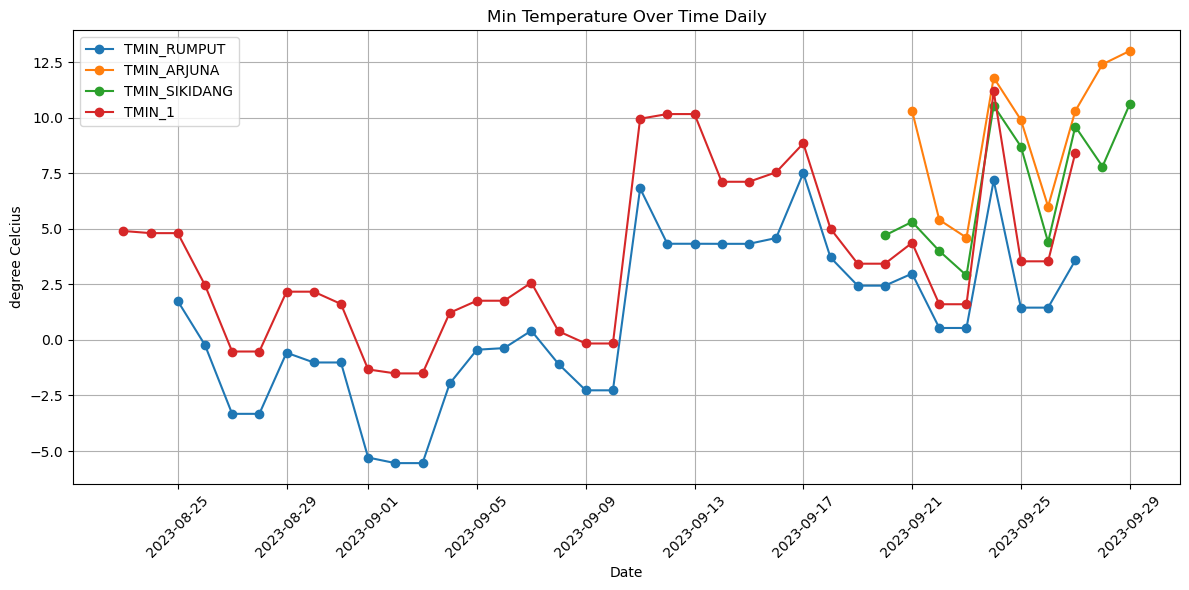

In [ ]:
df1_tmin = df1[['TT AIR MIN']].resample('D').min()
df2_tmin = df2[['TS_Min_T107']].resample('D').min()
df3_tmin = df3[['AirTC']].resample('D').min()
df4_tmin = df4[['Temp_Avg']].resample('D').min()
df5_tmin = df2[['TA_Min_T107']].resample('D').min()

# Select a specific time range (e.g., from '2023-01-03' to '2023-01-07')
# Define the range of dates and hours
start_datetime = '2023-08-25 00:00:00'
end_datetime = '2023-09-29 04:00:00'
df1_tmin_1 = df1_tmin[start_datetime:end_datetime]
df2_tmin_1 = df2_tmin[start_datetime:end_datetime]

# Create a figure
plt.figure(figsize=(12, 6))
# Plot the DataFrame, including the index
#plt.plot(df1_tmin_1.index, df1_tmin_1['TT AIR MIN'], label='TMIN')
plt.plot(df2_tmin_1.index, df2_tmin_1['TS_Min_T107'], label='TMIN_RUMPUT', marker='o')
plt.plot(df3_tmin.index, df3_tmin['AirTC'], label='TMIN_ARJUNA', marker='o')
plt.plot(df4_tmin.index, df4_tmin['Temp_Avg'], label='TMIN_SIKIDANG', marker='o')
plt.plot(df5_tmin.index, df5_tmin['TA_Min_T107'], label='TMIN_1', marker='o')


# Customize the plot
plt.title('Min Temperature Over Time Daily')
plt.xlabel('Date')
plt.ylabel('degree Celcius')
plt.grid(True)
plt.legend()

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure all elements fit within the figure area
plt.show()



In [ ]:
# Create a new DataFrame with columns for the hour and month
df1['Hour'] = df1.index.hour
df1['Date'] = df1.index.date
df1['Month'] = df1.index.month
df1['Year'] = df1.index.year

In [ ]:
df1['Date'] = df1.index.date

In [ ]:
# Group the data by month and hour, and calculate the mean
grouped_data = df1[['TT AIR MIN', 'Hour', 'Date']].groupby(['Hour', 'Date']).mean()

# Reshape the grouped data to create a heatmap
heatmap_data = grouped_data.unstack()

In [ ]:
# Define the desired order for the new index [1, 2, 0]
new_index_order = [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 0]

# Replace the index with the desired order
heatmap_data1 = heatmap_data.reindex(new_index_order)

In [ ]:
heatmap_data

TT AIR MIN                                                         \
Month         1          2          3          4          5          6    
Hour                                                                      
0      14.233086  14.259000  14.089790  14.094433  13.234411  11.974439   
1      14.320889  14.280545  14.718065  14.777444  14.099167  12.824778   
2      14.310778  14.232761  14.702097  14.769000  14.100225  12.817000   
3      14.299778  14.230377  14.686129  14.769000  14.044709  12.817000   
4      14.292667  14.231742  14.683280  14.777079  13.984286  12.812611   
5      14.291611  14.227226  14.667204  14.766278  13.971053  12.769769   
6      14.279889  14.256783  14.591882  14.749330  13.958276  12.745988   
7      14.245876  14.207174  14.461989  14.719385  13.957471  12.733448   
8      14.168218  14.143194  14.379570  14.625084  13.952184  12.737877   
9      14.121034  14.026528  14.346720  14.509719  13.985337  12.691944   
10     14.059310  13.947260  14.322527  14.411017  13.896944  12.583778   
11     13.947529  13.843154  14.124946  14.166949  13.552222  12.448056   
12     13.782159  13.689867  13.854409  13.878588  13.038944  12.228722   
13     13.666056  13.512581  13.571398  13.563111  12.460056  11.827833   
14     13.541722  13.406667  13.279349  13.262402  11.933889  11.495967   
15     13.405611  13.388800  12.967763  12.958944  11.342822  11.060978   
16     13.213389  13.319813  12.660349  12.627444  10.795708  10.547133   
17     13.069222  13.269074  12.376742  12.301889  10.253023  10.106172   
18     12.960144  13.235432  12.020699  12.012599   9.816966   9.648931   
19     12.844394  13.205000  11.727220  11.635749   9.432339   9.198247   
20     12.632040  13.193019  11.435290  11.267322   9.079534   8.758983   
21     12.541397  13.168250  11.218291  10.956637   8.776862   8.383236   
22     12.373661  13.086090  10.984467  10.681989   8.455172   7.986190   
23     12.273080  13.047500  10.933922  10.607708   8.290241   7.779467   

                                                                         
Month         7          8          9          10         11         12  
Hour                                                                     
0      10.675370  10.982522  13.622694  15.004675  15.211860  14.591934  
1      11.540932  12.037942  14.361250  15.180365  15.562471  14.961405  
2      11.540775  12.051732  14.348325  15.094115  15.540578  14.872333  
3      11.562330  12.187386  14.333429  15.064583  15.491098  14.804318  
4      11.551783  12.202980  14.335000  15.044323  15.407798  14.671294  
5      11.505184  12.215616  14.407304  15.006263  15.375000  14.570828  
6      11.499933  12.091660  14.404778  14.936398  15.275871  14.586229  
7      11.489820  12.077248  14.359000  14.793187  15.070688  14.468547  
8      11.476417  12.085781  14.264072  14.665351  14.964639  14.321111  
9      11.519183  12.068620  14.204322  14.614301  14.852952  14.174333  
10     11.321873  11.901912  13.829951  14.469570  14.729321  14.070000  
11     10.909688  11.460416  13.270343  14.170815  14.474506  13.904889  
12     10.531397  10.859085  12.683340  13.839730  14.208862  13.734341  
13     10.088750  10.247905  12.295941  13.520376  14.025060  13.509827  
14      9.594352   9.689421  11.956700  13.213069  13.820180  13.381017  
15      9.185199   8.989195  11.578104  12.949958  13.631607  13.203224  
16      8.565951   8.300689  11.187941  12.853380  13.472096  13.028441  
17      7.972109   7.719003  10.778157  12.757906  13.364417  12.772097  
18      7.487319   7.144753  10.382824  12.631031  13.106964  12.461602  
19      7.101732   6.532446  10.003466  12.473589  12.795000  12.108286  
20      6.878383   5.916660   9.516025  12.188094  12.593988  12.017056  
21      6.648128   5.477538   9.030054  11.906521  12.461404  11.884611  
22      6.410600   5.154087   8.709525  11.597292  12.281850  11.698108  
23      6.328174   4.950020   8.553132  11.526117  12.25

In [1]:
# Create a heatmap
plt.figure(figsize=(12, 6))
plt.imshow(heatmap_data, cmap='coolwarm', aspect='auto', origin='lower')

idx=[0,1,2,3,4,5,6,7,8,9,10,11]
idy= np.arange(24)

# Rename the index to a new name
heatmap_data_index = [7, 8,  9,  10,  11,  12,  13,  14,  15,  16, 17, 18, 19, 20, 21, 22, 23, 24,
       1, 2, 3, 4, 5, 6]
nama=['jan','feb','mar','apr','may','jun','jul','agt','sep', 'oct','nov','dec', ]
# Customize the heatmap
plt.colorbar(label='Degree celcius')
plt.title('Heatmap Plot by Hour of the Daily mean')
plt.xlabel('Date')
plt.ylabel('Hour (LT)')
plt.yticks(idy, heatmap_data_index )
# plt.xticks(idx, nama )

# Customize the tick labels for better readability
# month_labels = [f'Hour {month}' for month in heatmap_data.index]
# hour_labels = [str(hour) for hour in heatmap_data.columns]
# plt.xticks(np.arange(len(hour_labels)), hour_labels, rotation=45)
# plt.yticks(np.arange(len(month_labels)), month_labels)

plt.show()

NameError: ignored

In [ ]:
heatmap_data1 = heatmap_data.unstack()


In [ ]:
# Delete columns with NaN values
heatmap_data2 = heatmap_data1.dropna(axis=1)

In [ ]:
# Define the desired order for the new index [1, 2, 0]
new_index_order = [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 0]

# Replace the index with the desired order
heatmap_data2 = heatmap_data2.reindex(new_index_order)

In [ ]:
heatmap_data2

TT AIR MIN                                                         \
Year        2022                                                   2023   
Month         8          9          10         11         12         1    
Hour                                                                      
0      12.695845  14.119725  15.004675  15.211860  14.591934  14.233086   
1      13.177280  14.620950  15.180365  15.562471  14.961405  14.320889   
2      13.165500  14.603464  15.094115  15.540578  14.872333  14.310778   
3      13.433083  14.584667  15.064583  15.491098  14.804318  14.299778   
4      13.495000  14.583017  15.044323  15.407798  14.671294  14.292667   
5      13.310655  14.662611  15.006263  15.375000  14.570828  14.291611   
6      12.969733  14.661173  14.936398  15.275871  14.586229  14.279889   
7      12.934483  14.613523  14.793187  15.070688  14.468547  14.245876   
8      12.928624  14.514176  14.665351  14.964639  14.321111  14.168218   
9      12.912346  14.453486  14.614301  14.852952  14.174333  14.121034   
10     12.821500  14.109162  14.469570  14.729321  14.070000  14.059310   
11     12.457160  13.602389  14.170815  14.474506  13.904889  13.947529   
12     12.155677  13.175140  13.839730  14.208862  13.734341  13.782159   
13     11.864588  12.835000  13.520376  14.025060  13.509827  13.666056   
14     11.618561  12.510726  13.213069  13.820180  13.381017  13.541722   
15     11.199303  12.198247  12.949958  13.631607  13.203224  13.405611   
16     10.825932  11.898916  12.853380  13.472096  13.028441  13.213389   
17     10.548195  11.573517  12.757906  13.364417  12.772097  13.069222   
18     10.114127  11.256433  12.631031  13.106964  12.461602  12.960144   
19      9.676190  10.918356  12.473589  12.795000  12.108286  12.844394   
20      9.166563  10.538804  12.188094  12.593988  12.017056  12.632040   
21      8.652921  10.069478  11.906521  12.461404  11.884611  12.541397   
22      8.300667   9.772078  11.597292  12.281850  11.698108  12.373661   
23      8.165617   9.645150  11.526117  12.254167  11.666774  12.273080   

                                                                         \
Year                                                                      
Month         2          3          4          5          6          7    
Hour                                                                      
0      14.259000  14.089790  14.094433  13.234411  11.974439  10.675370   
1      14.280545  14.718065  14.777444  14.099167  12.824778  11.540932   
2      14.232761  14.702097  14.769000  14.100225  12.817000  11.540775   
3      14.230377  14.686129  14.769000  14.044709  12.817000  11.562330   
4      14.231742  14.683280  14.777079  13.984286  12.812611  11.551783   
5      14.227226  14.667204  14.766278  13.971053  12.769769  11.505184   
6      14.256783  14.591882  14.749330  13.958276  12.745988  11.499933   
7      14.207174  14.461989  14.719385  13.957471  12.733448  11.489820   
8      14.143194  14.379570  14.625084  13.952184  12.737877  11.476417   
9      14.026528  14.346720  14.509719  13.985337  12.691944  11.519183   
10     13.947260  14.322527  14.411017  13.896944  12.583778  11.321873   
11     13.843154  14.124946  14.166949  13.552222  12.448056  10.909688   
12     13.689867  13.854409  13.878588  13.038944  12.228722  10.531397   
13     13.512581  13.571398  13.563111  12.460056  11.827833  10.088750   
14     13.406667  13.279349  13.262402  11.933889  11.495967   9.594352   
15     13.388800  12.967763  12.958944  11.342822  11.060978   9.185199   
16     13.319813  12.660349  12.627444  10.795708  10.547133   8.565951   
17     13.269074  12.376742  12.301889  10.253023  10.106172   7.972109   
18     13.235432  12.020699  12.012599   9.816966   9.648931   7.487319   
19     13.205000  11.727220  11.635749   9.432339   9.198247   7.101732   
20     13.193019  11.435290  11.267322   9.079534   8.758983   6.878383   
21     13.168250  11.218291  1

In [ ]:
heatmap_data_index1 = [7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,1,2,3,4,5,6]

In [ ]:
print(heatmap_data_index)
print(heatmap_data_index1)
print(heatmap_data2.index)

[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 1, 2, 3, 4, 5, 6, 7]
[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 1, 2, 3, 4, 5, 6]
Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23],
      dtype='int32', name='Hour')


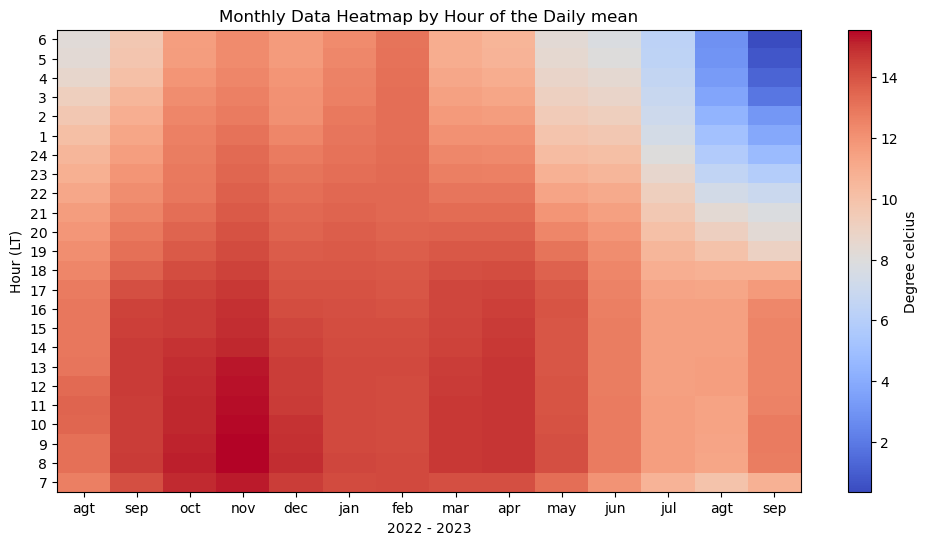

In [ ]:
# Create a heatmap
plt.figure(figsize=(12, 6))
plt.imshow(heatmap_data2, cmap='coolwarm', aspect='auto', origin='lower')

idx=[0,1,2,3,4,5,6,7,8,9,10,11,12,13]
idy= np.arange(24)

nama=['agt','sep','oct','nov','dec','jan','feb','mar','apr','may','jun','jul','agt','sep' ]
# Customize the heatmap
plt.colorbar(label='Degree celcius')
plt.title('Monthly Data Heatmap by Hour of the Daily mean')
plt.xlabel('2022 - 2023')
plt.ylabel('Hour (LT)')
plt.yticks(idy, heatmap_data_index1 )
plt.xticks(idx, nama )
# Customize the tick labels for better readability
# month_labels = [f'Hour {month}' for month in heatmap_data.index]
# hour_labels = [str(hour) for hour in heatmap_data.columns]
# plt.xticks(np.arange(len(hour_labels)), hour_labels, rotation=45)
# plt.yticks(np.arange(len(month_labels)), month_labels)

plt.show()

### SOLAR RADIATION

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_csv("df_clean1.csv")
df2 = pd.read_csv("df_suhu_grass1.csv")
df3 = pd.read_csv('pws_arjuna.csv')
df4 = pd.read_csv('pws_sikidang.csv')

# Convert the 'date' column to datetime
df1['TIMESTAMP'] = pd.to_datetime(df1['date_time'])
df2['TIMESTAMP'] = pd.to_datetime(df2['TIMESTAMP'])
df3['TIMESTAMP'] = pd.to_datetime(df3['TIMESTAMP'])
df4['TIMESTAMP'] = pd.to_datetime(df4['TIMESTAMP'])

df1.set_index('TIMESTAMP', inplace=True)
df2.set_index('TIMESTAMP', inplace=True)
df3.set_index('TIMESTAMP', inplace=True)
df4.set_index('TIMESTAMP', inplace=True)

In [ ]:
df2

index  RECORD  TA_meas_Avg  RH_meas_Avg  PA_meas_Avg  \
TIMESTAMP                                                                   
2023-08-23 02:26:00      0       0        17.25        79.09     798.8032   
2023-08-23 02:27:00      1       1        16.87        79.70     798.4141   
2023-08-23 02:28:00      2       2        16.27        81.00     798.4146   
2023-08-23 02:29:00      3       3        16.81        78.77     798.3934   
2023-08-23 02:30:00      4       4        16.69        79.01     798.4031   
...                    ...     ...          ...          ...          ...   
2023-09-27 04:18:00  50476   50476        18.51        49.99     797.8069   
2023-09-27 04:19:00  50477   50477        17.93        49.62     797.8065   
2023-09-27 04:20:00  50478   50478        17.78        50.43     797.8043   
2023-09-27 04:21:00  50479   50479        17.74        50.38     797.8032   
2023-09-27 04:22:00  50480   50480        18.30        50.67     797.8798   

                     SR_meas_Avg  WS_meas_Avg  WD_meas_Avg  PR_meas_Tot  \
TIMESTAMP                                                                 
2023-08-23 02:26:00     261.5852     2.433893        312.3          0.0   
2023-08-23 02:27:00     271.7879     2.938963        328.1          0.0   
2023-08-23 02:28:00     180.1049     2.712599        337.7          0.0   
2023-08-23 02:29:00     296.7379     1.828960        335.0          0.0   
2023-08-23 02:30:00     218.2488     2.481457        320.6          0.0   
...                          ...          ...          ...          ...   
2023-09-27 04:18:00    1133.3760     6.485205         98.6          0.0   
2023-09-27 04:19:00    1129.9910     5.609155        146.6          0.0   
2023-09-27 04:20:00    1129.9030     4.882663        109.5          0.0   
2023-09-27 04:21:00    1128.4690     6.419691         97.1          0.0   
2023-09-27 04:22:00    1132.1140     7.427126        103.4          0.0   

                     PR_meas_Total  ...  RH_meas_Hygro_Avg  RH_Max_Hygro  \
TIMESTAMP                           ...                                    
2023-08-23 02:26:00            0.0  ...              79.37         79.37   
2023-08-23 02:27:00            0.0  ...              78.20         79.37   
2023-08-23 02:28:00            0.0  ...              78.62         79.37   
2023-08-23 02:29:00            0.0  ...              79.42         79.92   
2023-08-23 02:30:00            0.0  ...              78.50         79.92   
...                            ...  ...                ...           ...   
2023-09-27 04:18:00            0.0  ...              51.43         62.91   
2023-09-27 04:19:00            0.0  ...              52.88         62.91   
2023-09-27 04:20:00            0.0  ...              53.65         62.91   
2023-09-27 04:21:00            0.0  ...              51.94         62.91   
2023-09-27 04:22:00            0.0  ...              55.10         62.91   

                     RH_Min_Hygro  TA_meas_T107_Avg  TA_Max_T107  TA_Min_T107  \
TIMESTAMP                                                                       
2023-08-23 02:26:00         79.37             17.50        17.50        17.50   
2023-08-23 02:27:00         78.01             17.23        17.50        17.17   
2023-08-23 02:28:00         78.01             16.82        17.50        16.75   
2023-08-23 02:29:00         78.01             17.06        17.50        16.75   
2023-08-23 02:30:00         77.87             16.99        17.50        16.75   
...                           ...               ...          ...          ...   
2023-09-27 04:18:00         46.50             18.53        18.73        14.61   
2023-09-27 04:19:00         46.50             18.11        18.73        14.61   
2023-09-27 04:20:00         46.50             17.91        18.73        14.61   
2023-09-27 04:21:00         46.50             17.78        18.73        14.61   
2023-09-27 04:22:00         46.50             18.07        18.73        14.61   



### EXTRAPOLATION

In [ ]:
# Merge the DataFrames based on their index
result = pd.merge(df5_tmin, df2_tmin_1, left_index=True, right_index=True)
result

TA_Min_T107  TS_Min_T107
TIMESTAMP                           
2023-08-25        4.803        1.751
2023-08-26        2.468       -0.229
2023-08-27       -0.523       -3.327
2023-08-28       -0.523       -3.327
2023-08-29        2.169       -0.577
2023-08-30        2.169       -1.016
2023-08-31        1.617       -1.016
2023-09-01       -1.329       -5.293
2023-09-02       -1.508       -5.544
2023-09-03       -1.508       -5.544
2023-09-04        1.219       -1.962
2023-09-05        1.762       -0.442
2023-09-06        1.762       -0.370
2023-09-07        2.574        0.414
2023-09-08        0.389       -1.085
2023-09-09       -0.162       -2.269
2023-09-10       -0.162       -2.269
2023-09-11        9.950        6.817
2023-09-12       10.160        4.325
2023-09-13       10.160        4.325
2023-09-14        7.114        4.322
2023-09-15        7.114        4.322
2023-09-16        7.541        4.583
2023-09-17        8.840        7.504
2023-09-18        5.004        3.707
2023-09-19        3.428        2.440
2023-09-20        3.428        2.440
2023-09-21        4.367        2.982
2023-09-22        1.604        0.536
2023-09-23        1.604        0.536
2023-09-24       11.180        7.176
2023-09-25        3.535        1.451
2023-09-26        3.535        1.451
2023-09-27        8.410        3.577

In [ ]:
result['gap'] = result['TA_Min_T107']-result['TS_Min_T107']
result

TA_Min_T107  TS_Min_T107    gap
TIMESTAMP                                  
2023-08-25        4.803        1.751  3.052
2023-08-26        2.468       -0.229  2.697
2023-08-27       -0.523       -3.327  2.804
2023-08-28       -0.523       -3.327  2.804
2023-08-29        2.169       -0.577  2.746
2023-08-30        2.169       -1.016  3.185
2023-08-31        1.617       -1.016  2.633
2023-09-01       -1.329       -5.293  3.964
2023-09-02       -1.508       -5.544  4.036
2023-09-03       -1.508       -5.544  4.036
2023-09-04        1.219       -1.962  3.181
2023-09-05        1.762       -0.442  2.204
2023-09-06        1.762       -0.370  2.132
2023-09-07        2.574        0.414  2.160
2023-09-08        0.389       -1.085  1.474
2023-09-09       -0.162       -2.269  2.107
2023-09-10       -0.162       -2.269  2.107
2023-09-11        9.950        6.817  3.133
2023-09-12       10.160        4.325  5.835
2023-09-13       10.160        4.325  5.835
2023-09-14        7.114        4.322  2.792
2023-09-15        7.114        4.322  2.792
2023-09-16        7.541        4.583  2.958
2023-09-17        8.840        7.504  1.336
2023-09-18        5.004        3.707  1.297
2023-09-19        3.428        2.440  0.988
2023-09-20        3.428        2.440  0.988
2023-09-21        4.367        2.982  1.385
2023-09-22        1.604        0.536  1.068
2023-09-23        1.604        0.536  1.068
2023-09-24       11.180        7.176  4.004
2023-09-25        3.535        1.451  2.084
2023-09-26        3.535        1.451  2.084
2023-09-27        8.410        3.577  4.833

In [ ]:
print('mean :', result['gap'].mean())
print('median :', result['gap'].median())

mean : 2.700058823529412
median : 2.7215


<Axes: xlabel='TIMESTAMP'>

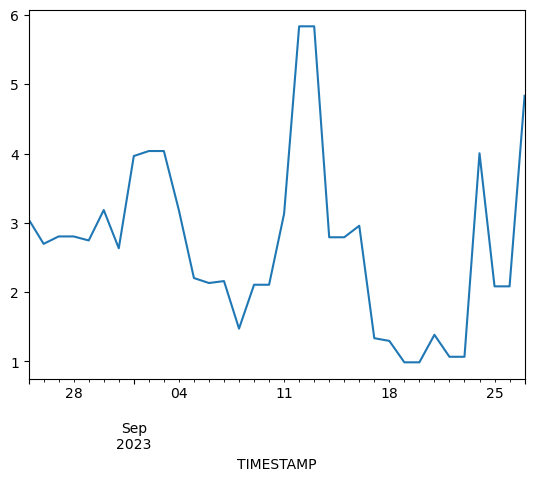

In [ ]:
result['gap'].plot()

In [ ]:
df1

ID STASIUN         NAMA STA      LAT        LNG  \
TIMESTAMP                                                                   
2022-08-05 09:50:00+00:00    STA2285        AWS Batur -7.20399  109.91158   
2022-08-05 10:00:00+00:00    STA2285        AWS Batur -7.20399  109.91158   
2022-08-05 10:10:00+00:00    STA2285        AWS Batur -7.20399  109.91158   
2022-08-05 10:20:00+00:00    STA2285        AWS Batur -7.20399  109.91158   
2022-08-05 10:30:00+00:00    STA2285        AWS Batur -7.20399  109.91158   
...                              ...              ...      ...        ...   
2023-09-05 03:20:00+00:00    STA2285  AWS Batur Dieng -7.20399  109.91158   
2023-09-05 03:30:00+00:00    STA2285  AWS Batur Dieng -7.20399  109.91158   
2023-09-05 03:40:00+00:00    STA2285  AWS Batur Dieng -7.20399  109.91158   
2023-09-05 03:50:00+00:00    STA2285  AWS Batur Dieng -7.20399  109.91158   
2023-09-05 04:00:00+00:00    STA2285  AWS Batur Dieng -7.20399  109.91158   

                           ELEVASI                 TANGGAL   RR  WS AVG  \
TIMESTAMP                                                                 
2022-08-05 09:50:00+00:00   2078.0  2022-08-05 09:50:00+00  0.0   0.345   
2022-08-05 10:00:00+00:00   2078.0  2022-08-05 10:00:00+00  0.0   1.662   
2022-08-05 10:10:00+00:00   2078.0  2022-08-05 10:10:00+00  0.0   1.476   
2022-08-05 10:20:00+00:00   2078.0  2022-08-05 10:20:00+00  0.0   0.780   
2022-08-05 10:30:00+00:00   2078.0  2022-08-05 10:30:00+00  0.0   0.758   
...                            ...                     ...  ...     ...   
2023-09-05 03:20:00+00:00   2078.0  2023-09-05 03:20:00+00  0.0   3.793   
2023-09-05 03:30:00+00:00   2078.0  2023-09-05 03:30:00+00  0.0   3.289   
2023-09-05 03:40:00+00:00   2078.0  2023-09-05 03:40:00+00  0.0   3.021   
2023-09-05 03:50:00+00:00   2078.0  2023-09-05 03:50:00+00  0.0   3.133   
2023-09-05 04:00:00+00:00   2078.0  2023-09-05 04:00:00+00  0.0   3.600   

                           WS MAX  WD AVG  TT AIR MAX  TT AIR AVG  TT AIR MIN  \
TIMESTAMP                                                                       
2022-08-05 09:50:00+00:00   1.514   208.6       21.84       15.52       15.18   
2022-08-05 10:00:00+00:00   2.713   175.2       21.84       15.36       15.09   
2022-08-05 10:10:00+00:00   2.846   192.2       21.84       14.92       14.69   
2022-08-05 10:20:00+00:00   1.198   137.3       21.84       14.49       14.23   
2022-08-05 10:30:00+00:00   1.136   148.3       21.84       13.94       13.68   
...                           ...     ...         ...         ...         ...   
2023-09-05 03:20:00+00:00   5.633   300.6       19.22       17.87       14.16   
2023-09-05 03:30:00+00:00   5.380   207.1       19.22       17.57       14.16   
2023-09-05 03:40:00+00:00   5.009   155.8       19.22       16.96       14.16   
2023-09-05 03:50:00+00:00   4.908   313.5       19.22       17.82       14.16   
2023-09-05 04:00:00+00:00   5.519   219.1       19.22       17.63       14.16   

                           RH AVG    PP AIR   SR AVG  SR MAX  PH SEA  \
TIMESTAMP                                                              
2022-08-05 09:50:00+00:00   86.90  796.2658    84.70   249.7     NaN   
2022-08-05 10:00:00+00:00   86.90  796.3821    74.56   249.7     NaN   
2022-08-05 10:10:00+00:00   89.70  796.3670    44.77   249.7     NaN   
2022-08-05 10:20:00+00:00   90.10  796.3774    22.31   249.7     NaN   
2022-08-05 10:30:00+00:00   91.00  796.4604    10.80   249.7     NaN   
...                           ...       ...      ...     ...     ...   
2023-09-05 03:20:00+00:00   73.06  797.3772  1005.00  1138.0     NaN   
2023-09-05 03:30:00+00:00   73.64  797.3764   703.30  1138.0     NaN   
2023-09-05 03:40:00+00:00   75.19  797.3763   588.70  1200.0     NaN   
2023-09-05 03:50:00+00:00   72.75  797.3602   875.00  1234.0     NaN   
2023-09-05 04:00:00+00:00   73.58  797.3338  1087.00  1234.0     NaN   

                                           date_time  
TI

In [ ]:
df1.columns

Index(['ID STASIUN', 'NAMA STA', 'LAT', 'LNG', 'ELEVASI', 'TANGGAL', 'RR',
       'WS AVG', 'WS MAX', 'WD AVG', 'TT AIR MAX', 'TT AIR AVG', 'TT AIR MIN',
       'RH AVG', 'PP AIR', 'SR AVG', 'SR MAX', 'PH SEA', 'date_time'],
      dtype='object')

#### EKSTRAPOLATE 2

In [ ]:
df_extrapolate = pd.DataFrame(df1['TT AIR MIN'])
df_extrapolate

TT AIR MIN
TIMESTAMP                            
2022-08-05 09:50:00+00:00       15.18
2022-08-05 10:00:00+00:00       15.09
2022-08-05 10:10:00+00:00       14.69
2022-08-05 10:20:00+00:00       14.23
2022-08-05 10:30:00+00:00       13.68
...                               ...
2023-09-05 03:20:00+00:00       14.16
2023-09-05 03:30:00+00:00       14.16
2023-09-05 03:40:00+00:00       14.16
2023-09-05 03:50:00+00:00       14.16
2023-09-05 04:00:00+00:00       14.16

[54537 rows x 1 columns]

In [ ]:
df_extrapolate['TT AIR MIN GRASS'] = df_extrapolate['TT AIR MIN'] - 2.7

In [ ]:
df_extrapolate['SR AVG'] = df1['SR AVG']

In [ ]:
df_extrapolate['WD AVG'] = df1['WD AVG']
df_extrapolate['WS AVG'] = df1['WS AVG']
df_extrapolate['PP AIR'] = df1['PP AIR']

In [ ]:
df_extrapolate['TANGGAL'] = df1['TANGGAL']

In [ ]:
df_extrapolate.to_csv('extrapolate.csv', index='True')

## OPEN DATA

In [71]:
import pandas as pd
df_extrapolate = pd.read_csv("extrapolate.csv")

In [72]:
df_extrapolate

TIMESTAMP  TT AIR MIN  TT AIR MIN GRASS   SR AVG  \
0      2022-08-05 09:50:00+00:00       15.18             12.48    84.70   
1      2022-08-05 10:00:00+00:00       15.09             12.39    74.56   
2      2022-08-05 10:10:00+00:00       14.69             11.99    44.77   
3      2022-08-05 10:20:00+00:00       14.23             11.53    22.31   
4      2022-08-05 10:30:00+00:00       13.68             10.98    10.80   
...                          ...         ...               ...      ...   
54532  2023-09-05 03:20:00+00:00       14.16             11.46  1005.00   
54533  2023-09-05 03:30:00+00:00       14.16             11.46   703.30   
54534  2023-09-05 03:40:00+00:00       14.16             11.46   588.70   
54535  2023-09-05 03:50:00+00:00       14.16             11.46   875.00   
54536  2023-09-05 04:00:00+00:00       14.16             11.46  1087.00   

       WD AVG  WS AVG    PP AIR                 TANGGAL  
0       208.6   0.345  796.2658  2022-08-05 09:50:00+00  
1       175.2   1.662  796.3821  2022-08-05 10:00:00+00  
2       192.2   1.476  796.3670  2022-08-05 10:10:00+00  
3       137.3   0.780  796.3774  2022-08-05 10:20:00+00  
4       148.3   0.758  796.4604  2022-08-05 10:30:00+00  
...       ...     ...       ...                     ...  
54532   300.6   3.793  797.3772  2023-09-05 03:20:00+00  
54533   207.1   3.289  797.3764  2023-09-05 03:30:00+00  
54534   155.8   3.021  797.3763  2023-09-05 03:40:00+00  
54535   313.5   3.133  797.3602  2023-09-05 03:50:00+00  
54536   219.1   3.600  797.3338  2023-09-05 04:00:00+00  

[54537 rows x 8 columns]

In [73]:
from datetime import timedelta

# Specify the time difference between UTC and your local time
utc_offset = timedelta(hours=7)  # Example offset, replace with your own
df_extrapolate['TIMESTAMP'] = pd.to_datetime(df_extrapolate['TIMESTAMP'])
df_extrapolate['TANGGAL'] = pd.to_datetime(df_extrapolate['TANGGAL'])

df_extrapolate['Hour'] = df_extrapolate['TIMESTAMP'].dt.hour
df_extrapolate['Month'] = df_extrapolate['TIMESTAMP'].dt.month
# Shift the index from UTC to local time using timedelta
df_extrapolate['TANGGAL'] = df_extrapolate['TIMESTAMP'] + utc_offset

df_extrapolate.set_index('TIMESTAMP', inplace=True)
# Extract the hour values from the datetime index
# df_extrapolate['Hour'] = df_extrapolate['TIMESTAMP'].hour

In [74]:
df_extrapolate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 54537 entries, 2022-08-05 09:50:00+00:00 to 2023-09-05 04:00:00+00:00
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   TT AIR MIN        54537 non-null  float64            
 1   TT AIR MIN GRASS  54537 non-null  float64            
 2   SR AVG            54537 non-null  float64            
 3   WD AVG            54537 non-null  float64            
 4   WS AVG            54537 non-null  float64            
 5   PP AIR            54537 non-null  float64            
 6   TANGGAL           54537 non-null  datetime64[ns, UTC]
 7   Hour              54537 non-null  int32              
 8   Month             54537 non-null  int32              
dtypes: datetime64[ns, UTC](1), float64(6), int32(2)
memory usage: 3.7 MB


<Axes: >

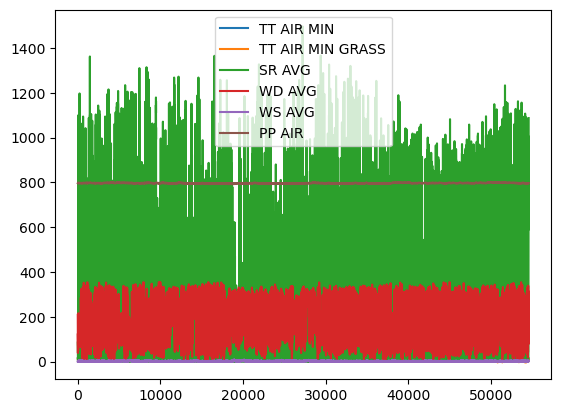

In [3]:
df_extrapolate.plot()

In [90]:
df_extrapolate.columns

Index(['TT AIR MIN', 'TT AIR MIN GRASS', 'SR AVG', 'WD AVG', 'WS AVG',
       'PP AIR', 'TANGGAL', 'Hour', 'Month'],
      dtype='object')

c:\Users\Deka\anaconda3\envs\python9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Deka\anaconda3\envs\python9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Deka\anaconda3\envs\python9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


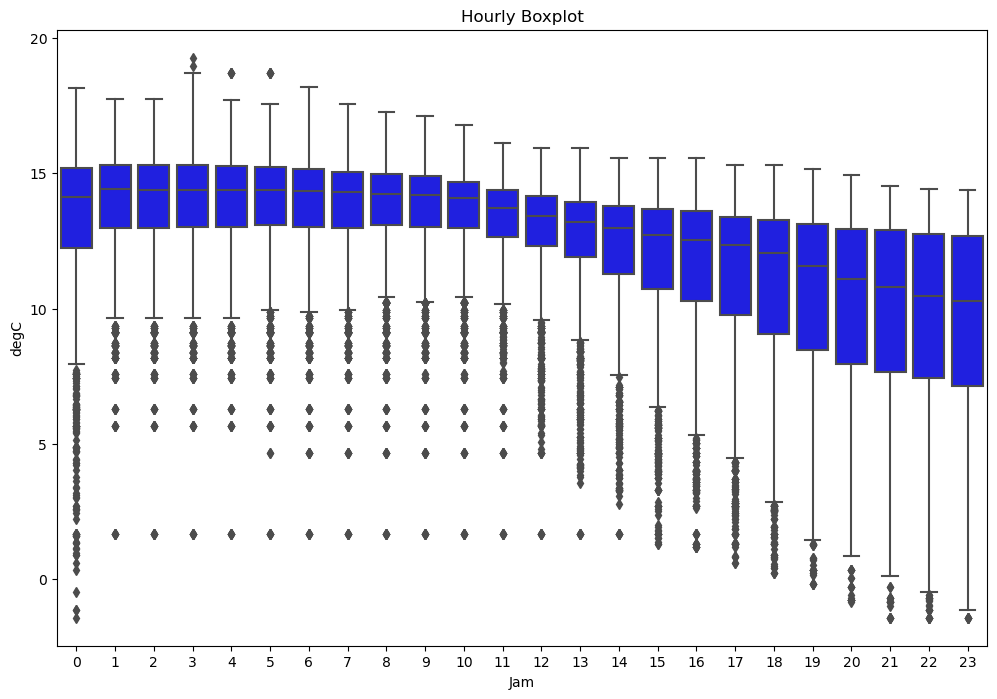

In [93]:
import seaborn as sns

# Create a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Hour', y='TT AIR MIN', data=df_extrapolate, color='blue')
plt.title('Hourly Boxplot')
plt.xlabel('Jam')
plt.ylabel('degC')
plt.show()

In [6]:
df_extrapolate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54537 entries, 0 to 54536
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TIMESTAMP         54537 non-null  object 
 1   TT AIR MIN        54537 non-null  float64
 2   TT AIR MIN GRASS  54537 non-null  float64
 3   SR AVG            54537 non-null  float64
 4   WD AVG            54537 non-null  float64
 5   WS AVG            54537 non-null  float64
 6   PP AIR            54537 non-null  float64
 7   TANGGAL           54537 non-null  object 
dtypes: float64(6), object(2)
memory usage: 3.3+ MB


In [81]:
data_jumlah_hari = df_extrapolate[['TT AIR MIN', 'Month']].resample('D').min()

In [86]:
freezing_events

Month
3.0     2
7.0     8
8.0    23
9.0     4
dtype: int64

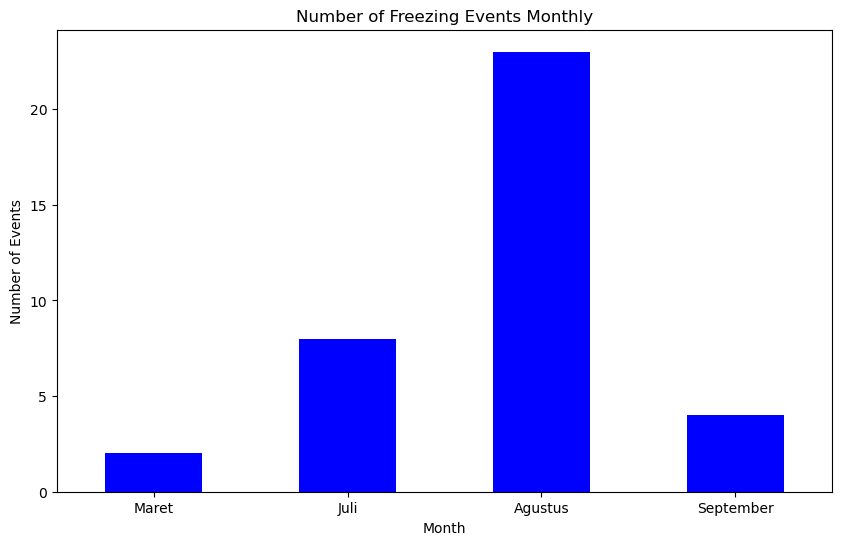

In [87]:
plt.figure(figsize=(10, 6))
freezing_events = data_jumlah_hari[data_jumlah_hari['TT AIR MIN'] < 3].groupby('Month').size()
freezing_events.plot(kind='bar', color='blue')
plt.title('Number of Freezing Events Monthly')
idx=[0,1,2,3]
nama_bulan = ['Maret', 'Juli', 'Agustus', 'September']
plt.xlabel('Month')
plt.ylabel('Number of Events')
plt.xticks(idx, nama_bulan, rotation=0)  # Optionally, rotate x-axis labels if needed
plt.show()


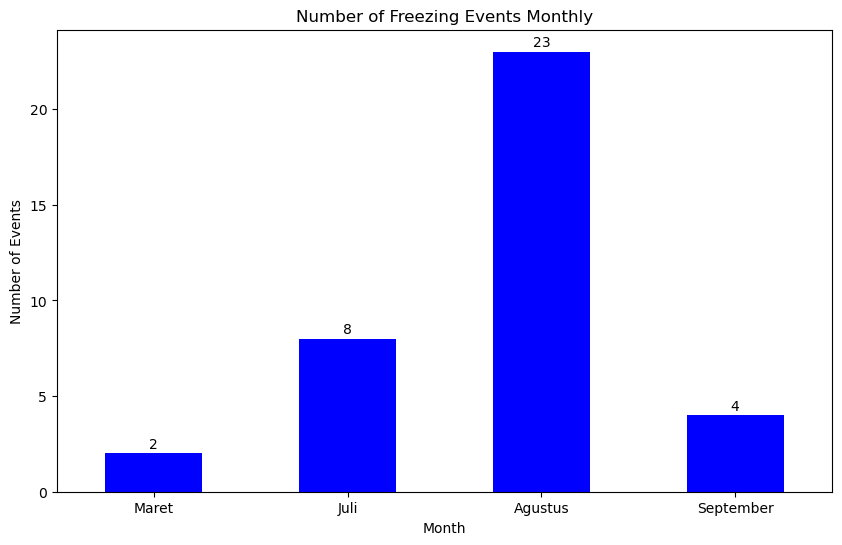

In [89]:
plt.figure(figsize=(10, 6))
# Create a bar plot
bars = freezing_events.plot(kind='bar', color='blue')

# Add numbers on top of the bars
for i, value in enumerate(freezing_events):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

plt.title('Number of Freezing Events Monthly')
idx = [0, 1, 2, 3]
nama_bulan = ['Maret', 'Juli', 'Agustus', 'September']
plt.xlabel('Month')
plt.ylabel('Number of Events')
plt.xticks(idx, nama_bulan, rotation=0)  # Optionally, rotate x-axis labels if needed

# Show the plot
plt.show()

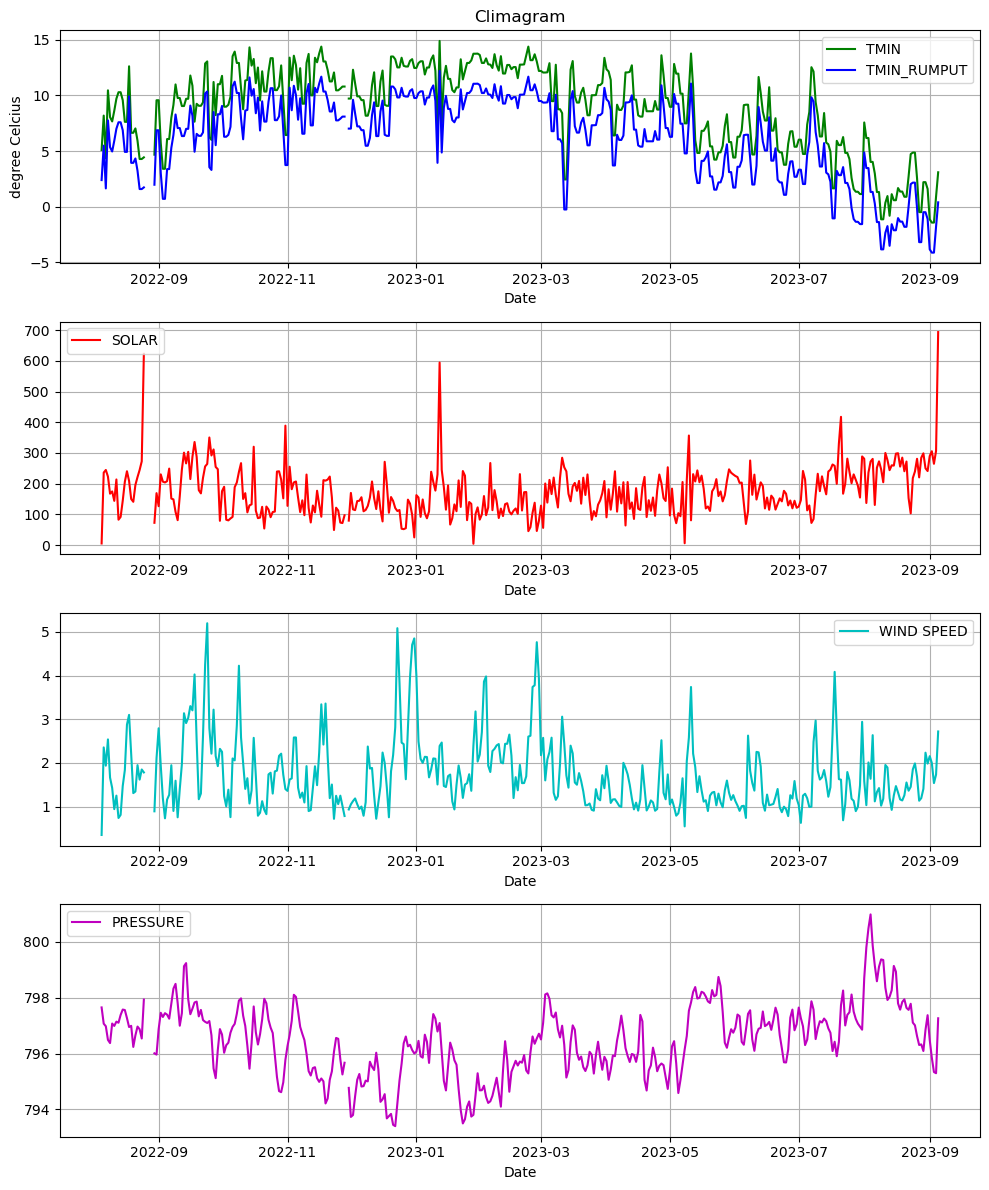

In [8]:
import matplotlib.pyplot as plt

data1 = df_extrapolate[['TT AIR MIN']].resample('D').min()
data2 = df_extrapolate[['TT AIR MIN GRASS']].resample('D').min()
data3 = df_extrapolate[['SR AVG']].resample('D').mean()
#data4 = df_extrapolate[['WD AVG']].resample('D').min()
data5 = df_extrapolate[['WS AVG']].resample('D').mean()
data6 = df_extrapolate[['PP AIR']].resample('D').mean()


# Create a figure
plt.figure(figsize=(10, 12))
# Plot the DataFrame, including the index
#plt.plot(df1_tmin_1.index, df1_tmin_1['TT AIR MIN'], label='TMIN')
plt.subplot(4, 1, 1)
plt.plot(data1.index, data1['TT AIR MIN'], label='TMIN', color='g')
plt.plot(data2.index, data2['TT AIR MIN GRASS'], label='TMIN_RUMPUT', color='b')

# Customize the plot
plt.title('Climagram')
plt.xlabel('Date')
plt.ylabel('degree Celcius')
plt.grid(True)
plt.legend()


# plt.subplot(5, 1, 2)
# plt.plot(data2.index, data2['TT AIR MIN GRASS'], label='TMIN_RUMPUT', color='b')
# # Customize the plot
# #plt.title('Min Temperature Over Time Daily')
# plt.xlabel('Date')
# plt.ylabel('degree Celcius')
# plt.grid(True)
# plt.legend()


plt.subplot(4, 1, 2)
plt.plot(data3.index, data3['SR AVG'], label='SOLAR', color='r')
# Customize the plot
#plt.title('Min Temperature Over Time Daily')
plt.xlabel('Date')
#plt.ylabel('degree Celcius')
plt.grid(True)
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(data5.index, data5['WS AVG'], label='WIND SPEED', color='c')
# Customize the plot
#plt.title('Min Temperature Over Time Daily')
plt.xlabel('Date')
#plt.ylabel('degree Celcius')
plt.grid(True)
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(data6.index, data6['PP AIR'], label='PRESSURE', color='m')
# Customize the plot
#plt.title('Min Temperature Over Time Daily')
plt.xlabel('Date')
#plt.ylabel('degree Celcius')
plt.grid(True)
plt.legend()


# Show the plot
#plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure all elements fit within the figure area
plt.show()




# # Creating a subplot with 2 rows, 1 column, and working on the first subplot
# plt.subplot(2, 1, 1)
# plt.plot(x, y1, label='Sin(x)')
# plt.title('First Subplot')
# plt.legend()

# # Creating a subplot with 2 rows, 1 column, and working on the second subplot
# plt.subplot(2, 1, 2)
# plt.plot(x, y2, label='Cos(x)')
# plt.title('Second Subplot')
# plt.legend()

# # Adjust layout for better spacing
# plt.tight_layout()

# # Display the plot
# plt.show()


### NORMAL

In [150]:
df_extrapolate

TT AIR MIN  TT AIR MIN GRASS   SR AVG  WD AVG  \
TIMESTAMP                                                                  
2022-08-05 09:50:00+00:00       15.18             12.48    84.70   208.6   
2022-08-05 10:00:00+00:00       15.09             12.39    74.56   175.2   
2022-08-05 10:10:00+00:00       14.69             11.99    44.77   192.2   
2022-08-05 10:20:00+00:00       14.23             11.53    22.31   137.3   
2022-08-05 10:30:00+00:00       13.68             10.98    10.80   148.3   
...                               ...               ...      ...     ...   
2023-09-05 03:20:00+00:00       14.16             11.46  1005.00   300.6   
2023-09-05 03:30:00+00:00       14.16             11.46   703.30   207.1   
2023-09-05 03:40:00+00:00       14.16             11.46   588.70   155.8   
2023-09-05 03:50:00+00:00       14.16             11.46   875.00   313.5   
2023-09-05 04:00:00+00:00       14.16             11.46  1087.00   219.1   

                           WS AVG    PP AIR                   TANGGAL  Hour  \
TIMESTAMP                                                                     
2022-08-05 09:50:00+00:00   0.345  796.2658 2022-08-05 16:50:00+00:00     9   
2022-08-05 10:00:00+00:00   1.662  796.3821 2022-08-05 17:00:00+00:00    10   
2022-08-05 10:10:00+00:00   1.476  796.3670 2022-08-05 17:10:00+00:00    10   
2022-08-05 10:20:00+00:00   0.780  796.3774 2022-08-05 17:20:00+00:00    10   
2022-08-05 10:30:00+00:00   0.758  796.4604 2022-08-05 17:30:00+00:00    10   
...                           ...       ...                       ...   ...   
2023-09-05 03:20:00+00:00   3.793  797.3772 2023-09-05 10:20:00+00:00     3   
2023-09-05 03:30:00+00:00   3.289  797.3764 2023-09-05 10:30:00+00:00     3   
2023-09-05 03:40:00+00:00   3.021  797.3763 2023-09-05 10:40:00+00:00     3   
2023-09-05 03:50:00+00:00   3.133  797.3602 2023-09-05 10:50:00+00:00     3   
2023-09-05 04:00:00+00:00   3.600  797.3338 2023-09-05 11:00:00+00:00     4   

                           Month  
TIMESTAMP                         
2022-08-05 09:50:00+00:00      8  
2022-08-05 10:00:00+00:00      8  
2022-08-05 10:10:00+00:00      8  
2022-08-05 10:20:00+00:00      8  
2022-08-05 10:30:00+00:00      8  
...                          ...  
2023-09-05 03:20:00+00:00      9  
2023-09-05 03:30:00+00:00      9  
2023-09-05 03:40:00+00:00      9  
2023-09-05 03:50:00+00:00      9  
2023-09-05 04:00:00+00:00      9  

[54537 rows x 9 columns]

In [154]:
# Group by hour and calculate the mean for each group
hourly_average = df_extrapolate.groupby(df_extrapolate.index.hour).mean()
hourly_average

TT AIR MIN  TT AIR MIN GRASS      SR AVG      WD AVG    WS AVG  \
TIMESTAMP                                                                   
0           13.319787         10.619787  278.257235  169.711565  1.544543   
1           13.938027         11.238027  468.452487  187.290017  2.104599   
2           13.917307         11.217307  583.748305  203.336450  2.436981   
3           13.918496         11.218496  632.567841  208.524162  2.538756   
4           13.895875         11.195875  556.619206  206.978871  2.522529   
5           13.887141         11.187141  484.637739  204.793455  2.463367   
6           13.836281         11.136281  417.984008  201.084415  2.401435   
7           13.773935         11.073935  304.482434  193.873180  2.348731   
8           13.719244         11.019244  197.833297  189.145625  2.197331   
9           13.670175         10.970175  102.131274  184.404760  2.047057   
10          13.528745         10.828745   19.751806  180.302184  1.836928   
11          13.236531         10.536531    0.092110  172.013363  1.635438   
12          12.887646         10.187646    0.015907  170.978170  1.505348   
13          12.543779          9.843779    0.023074  170.209465  1.520058   
14          12.217301          9.517301    0.030694  168.276227  1.455092   
15          11.871701          9.171701    0.021815  170.491711  1.375472   
16          11.515685          8.815685    0.021747  170.993535  1.299110   
17          11.185264          8.485264    0.014357  169.685428  1.215779   
18          10.851909          8.151909    0.020004  168.028466  1.185548   
19          10.510012          7.810012    0.020361  171.809045  1.215093   
20          10.167229          7.467229    0.009877  169.144479  1.202967   
21           9.897092          7.197092    0.013762  171.664915  1.195090   
22           9.636393          6.936393    3.685229  167.366323  1.200737   
23           9.529754          6.829754   79.064077  167.046356  1.272795   

               PP AIR                             TANGGAL  Hour     Month  
TIMESTAMP                                                                  
0          797.148267 2023-02-25 17:58:24.740608256+00:00   0.0  6.648032  
1          797.529781 2023-02-22 06:25:11.063464704+00:00   1.0  6.654803  
2          797.616676 2023-02-22 21:24:22.208800768+00:00   2.0  6.644953  
3          797.402577 2023-02-22 14:37:39.252823552+00:00   3.0  6.648566  
4          796.950019 2023-02-22 14:25:59.947066624+00:00   4.0  6.629025  
5          796.373475 2023-02-22 04:34:21.818181632+00:00   5.0  6.616408  
6          795.788204 2023-02-22 14:29:18.713136640+00:00   6.0  6.628686  
7          795.341022 2023-02-22 21:19:37.698163968+00:00   7.0  6.656068  
8          795.185949 2023-02-22 02:07:15.267857152+00:00   8.0  6.663393  
9          795.321510 2023-02-21 10:16:04.323843328+00:00   9.0  6.668594  
10         795.676899 2023-02-21 00:14:37.536552960+00:00  10.0  6.663713  
11         796.162639    2023-02-21 12:24:13.203712+00:00  11.0  6.655767  
12         796.709331 2023-02-21 15:40:26.098418176+00:00  12.0  6.663445  
13         797.167382 2023-02-21 05:08:45.495376640+00:00  13.0  6.619991  
14         797.398583 2023-02-20 22:09:13.157894656+00:00  14.0  6.632895  
15         797.372663 2023-02-20 10:52:48.947368448+00:00  15.0  6.662719  
16         797.093448 2023-02-20 09:56:44.012211200+00:00  16.0  6.650240  
17         796.631431 2023-02-20 14:21:49.736841984+00:00  17.0  6.642105  
18         796.169501 2023-02-20 17:51:17.768014080+00:00  18.0  6.642355  
19         795.834917 2023-02-20 19:30:25.396825344+00:00  19.0  6.637566  
20         795.725330 2023-02-21 17:24:58.294709248+00:00  20.0  6.668124  
21         795.845995 2023-02-21 15:27:11.126698752+00:00  21.0  6.670758  
22         796.145595 2023-02-21 12:04:06.409807360+00:00  22.0  6.696585  
23         796.588254 2023-02-22 13:19:21.443662080+00:00  23.0  6.680458

### LANJUTAN

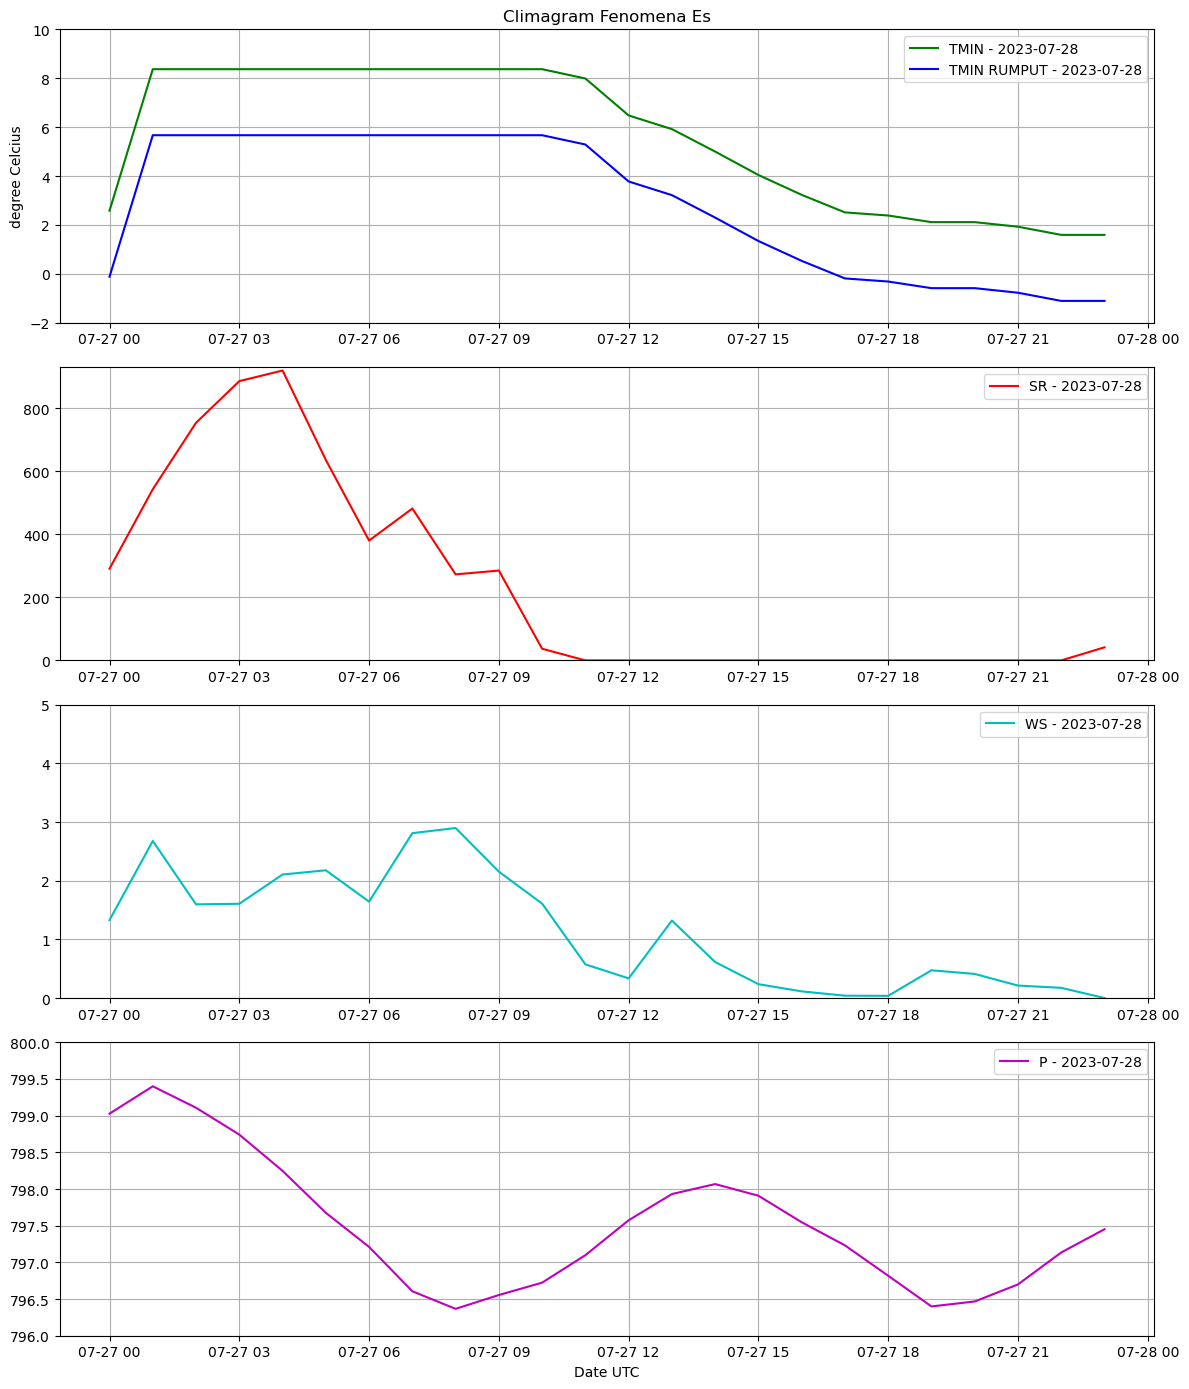

In [9]:

from datetime import datetime, timedelta

data1 = df_extrapolate[['TT AIR MIN', 'Hour']].resample('H').min()
data2 = df_extrapolate[['TT AIR MIN GRASS']].resample('H').min()
data3 = df_extrapolate[['SR AVG', 'Hour']].resample('H').mean()
#data4 = df_extrapolate[['WD AVG']].resample('D').min()
data5 = df_extrapolate[['WS AVG', 'Hour']].resample('H').mean()
data6 = df_extrapolate[['PP AIR', 'Hour']].resample('H').mean()


# Specify the start and end dates of the selected time range
start_date = '2023-07-27'
end_date = start_date



# Convert the start_date string to a datetime object
start_date_1 = datetime.strptime(start_date, '%Y-%m-%d')
# Add 1 day to the start date
tomorrow = start_date_1 + timedelta(days=1)

# Filter data1 for the selected time range
selected_data1 = data1.loc[start_date:end_date]
selected_data2 = data2.loc[start_date:end_date]
selected_data3 = data3.loc[start_date:end_date]
#selected_data4 = data4.loc[start_date:end_date]
selected_data5 = data5.loc[start_date:end_date]
selected_data6 = data6.loc[start_date:end_date]

# Create a figure
plt.figure(figsize=(12, 14))
# Plot the DataFrame, including the index
#plt.plot(df1_tmin_1.index, df1_tmin_1['TT AIR MIN'], label='TMIN')
plt.subplot(4, 1, 1)
plt.plot(selected_data1.index, selected_data1['TT AIR MIN'], label=f'TMIN - {tomorrow.strftime("%Y-%m-%d")}', color='g')
plt.plot(selected_data1.index, selected_data2['TT AIR MIN GRASS'], label=f'TMIN RUMPUT - {tomorrow.strftime("%Y-%m-%d")}', color='b')
plt.ylim(-2, 10)


# Customize the plot
plt.title('Climagram Fenomena Es')
# plt.xlabel('Date UTC')
plt.ylabel('degree Celcius')
plt.grid(True)
plt.legend()


plt.subplot(4, 1, 2)
plt.plot(selected_data1.index, selected_data3['SR AVG'], label=f'SR - {tomorrow.strftime("%Y-%m-%d")}', color='r')
plt.ylim(0, 930)
# Customize the plot
#plt.title('Min Temperature Over Time Daily')
# plt.xlabel('Date UTC')
#plt.ylabel('degree Celcius')
plt.grid(True)
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(selected_data1.index, selected_data5['WS AVG'], label=f'WS - {tomorrow.strftime("%Y-%m-%d")}', color='c')
plt.ylim(0, 5)
# Customize the plot
#plt.title('Min Temperature Over Time Daily')
# plt.xlabel('Date UTC')
#plt.ylabel('degree Celcius')
plt.grid(True)
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(selected_data1.index, selected_data6['PP AIR'], label=f'P - {tomorrow.strftime("%Y-%m-%d")}', color='m')
plt.ylim(796, 800)
# Customize the plot
#plt.title('Min Temperature Over Time Daily')
plt.xlabel('Date UTC')
#plt.ylabel('degree Celcius')
plt.grid(True)
plt.legend()


# Show the plot
#plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure all elements fit within the figure area
plt.show()

## FINALL 20231127

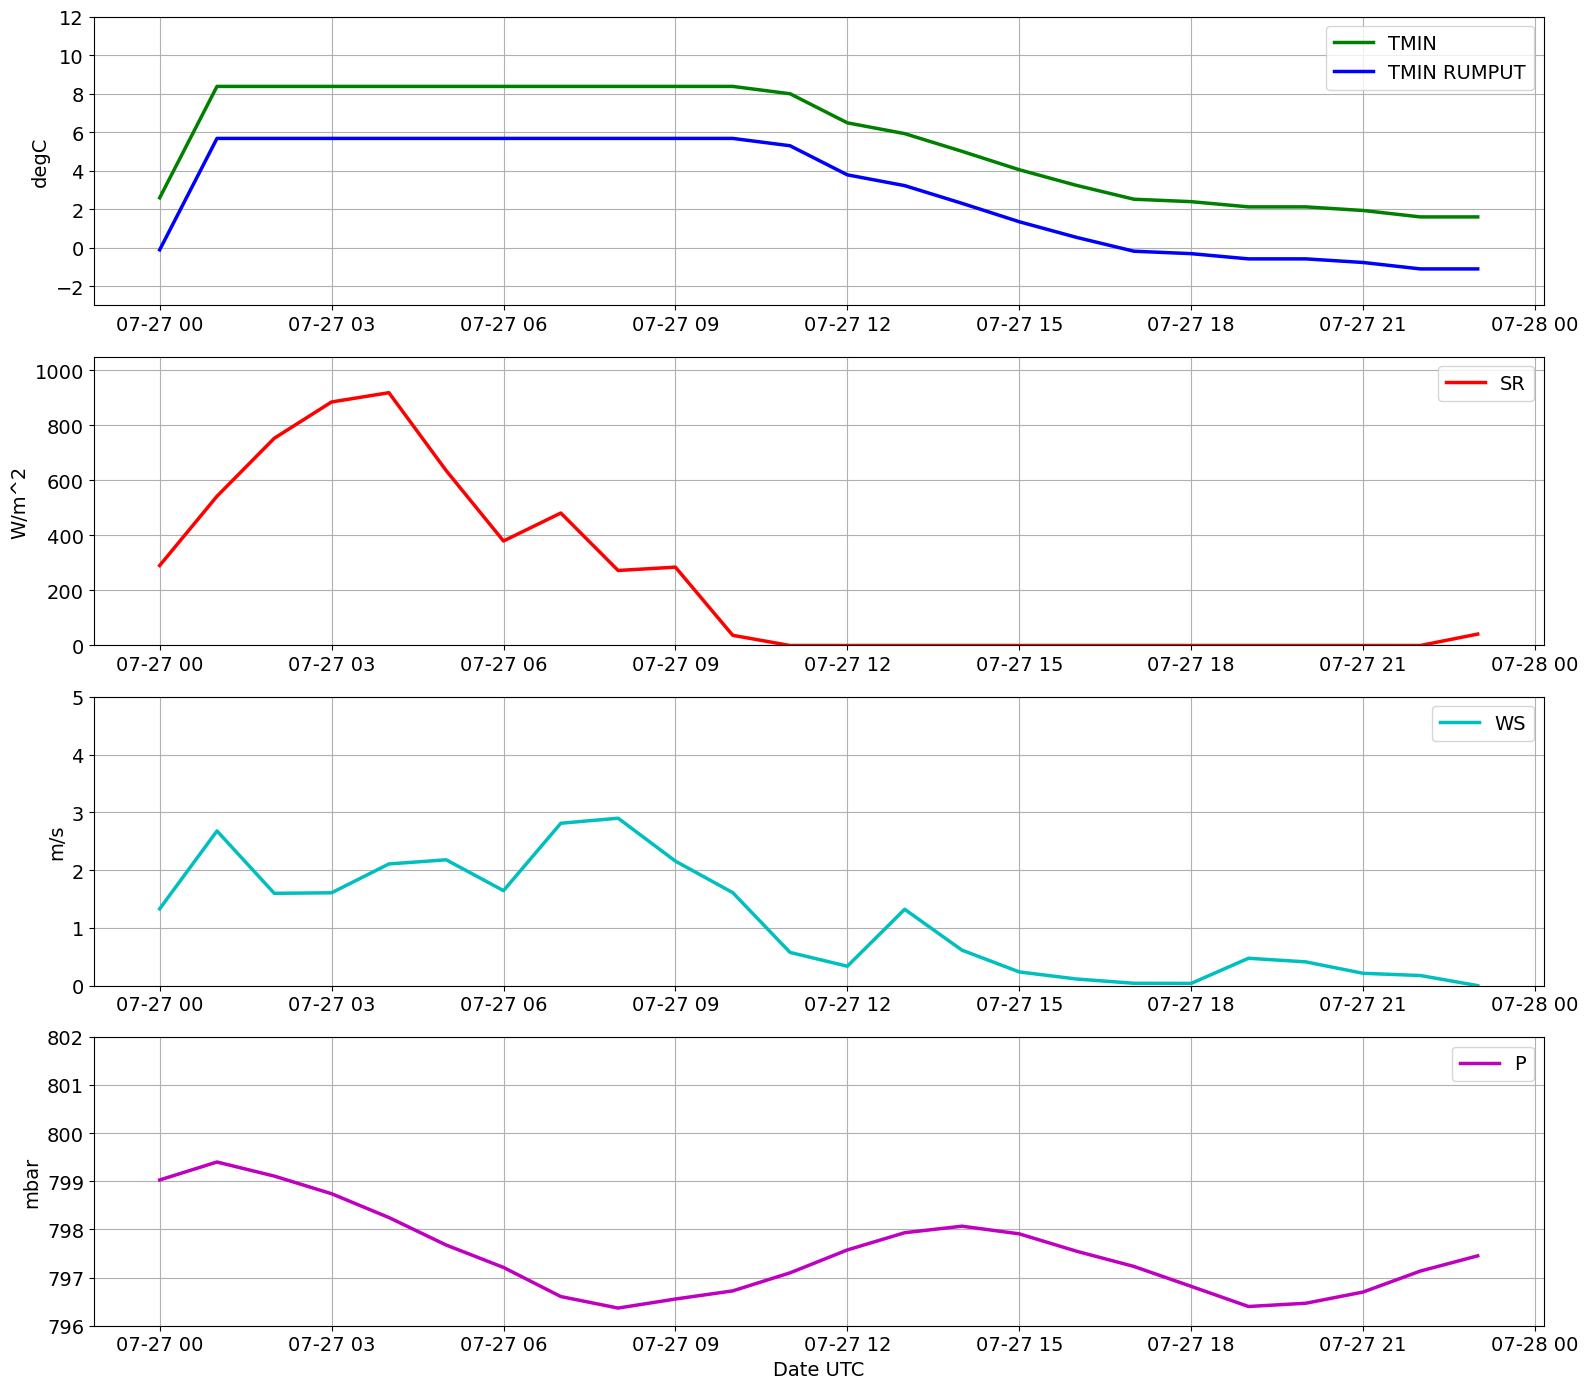

In [46]:

from datetime import datetime, timedelta
import numpy as np

data1 = df_extrapolate[['TT AIR MIN', 'Hour']].resample('H').min()
data2 = df_extrapolate[['TT AIR MIN GRASS']].resample('H').min()
data3 = df_extrapolate[['SR AVG', 'Hour']].resample('H').mean()
#data4 = df_extrapolate[['WD AVG']].resample('D').min()
data5 = df_extrapolate[['WS AVG', 'Hour']].resample('H').mean()
data6 = df_extrapolate[['PP AIR', 'Hour']].resample('H').mean()


# Specify the start and end dates of the selected time range
start_date = '2023-07-27'
end_date = start_date



# Convert the start_date string to a datetime object
start_date_1 = datetime.strptime(start_date, '%Y-%m-%d')
# Add 1 day to the start date
tomorrow = start_date_1 + timedelta(days=1)

# Filter data1 for the selected time range
selected_data1 = data1.loc[start_date:end_date]
selected_data2 = data2.loc[start_date:end_date]
selected_data3 = data3.loc[start_date:end_date]
#selected_data4 = data4.loc[start_date:end_date]
selected_data5 = data5.loc[start_date:end_date]
selected_data6 = data6.loc[start_date:end_date]


# Create a figure
plt.figure(figsize=(16, 14))
# Plot the DataFrame, including the index
#plt.plot(df1_tmin_1.index, df1_tmin_1['TT AIR MIN'], label='TMIN')
plt.subplot(4, 1, 1)
plt.plot(selected_data1.index, selected_data1['TT AIR MIN'], label=f'TMIN', color='g', lw=2.5)
plt.plot(selected_data1.index, selected_data2['TT AIR MIN GRASS'], label=f'TMIN RUMPUT', color='b', lw=2.5)
plt.ylim(-3, 12)

# Customize the plot
# plt.title('Climagram Fenomena Es')
plt.ylabel('degC', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)

plt.legend(fontsize=14)


plt.subplot(4, 1, 2)
plt.plot(selected_data1.index, selected_data3['SR AVG'], label=f'SR', color='r', lw=2.5)
plt.ylim(0, 1050)
# Customize the plot
#plt.title('Min Temperature Over Time Daily')
# plt.xlabel('Date UTC')
plt.yticks(fontsize=14)
plt.grid(True)
plt.ylabel('W/m^2', fontsize=14)
plt.xticks(fontsize=14)

plt.legend(fontsize=14)

plt.subplot(4, 1, 3)
plt.plot(selected_data1.index, selected_data5['WS AVG'], label=f'WS', color='c', lw=2.5)
plt.ylim(0, 5)
# Customize the plot
#plt.title('Min Temperature Over Time Daily')
plt.yticks(fontsize=14)
plt.ylabel('m/s', fontsize=14)
plt.xticks(fontsize=14)
plt.grid(True)
plt.xticks(fontsize=14)
plt.legend(fontsize=14)

plt.subplot(4, 1, 4)
plt.plot(selected_data1.index, selected_data6['PP AIR'], label=f'P', color='m', lw=2.5)
plt.ylim(796, 802)
# Customize the plot
#plt.title('Min Temperature Over Time Daily')
# Increase the size of the x-axis tick labels
plt.xticks(fontsize=14)  # You can adjust the fontsize as needed
plt.yticks(fontsize=14)
plt.xlabel('Date UTC', fontsize=14)
plt.ylabel('mbar', fontsize=14)
plt.grid(True)
plt.legend(fontsize=14)


# Show the plot
#plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure all elements fit within the figure area
plt.show()

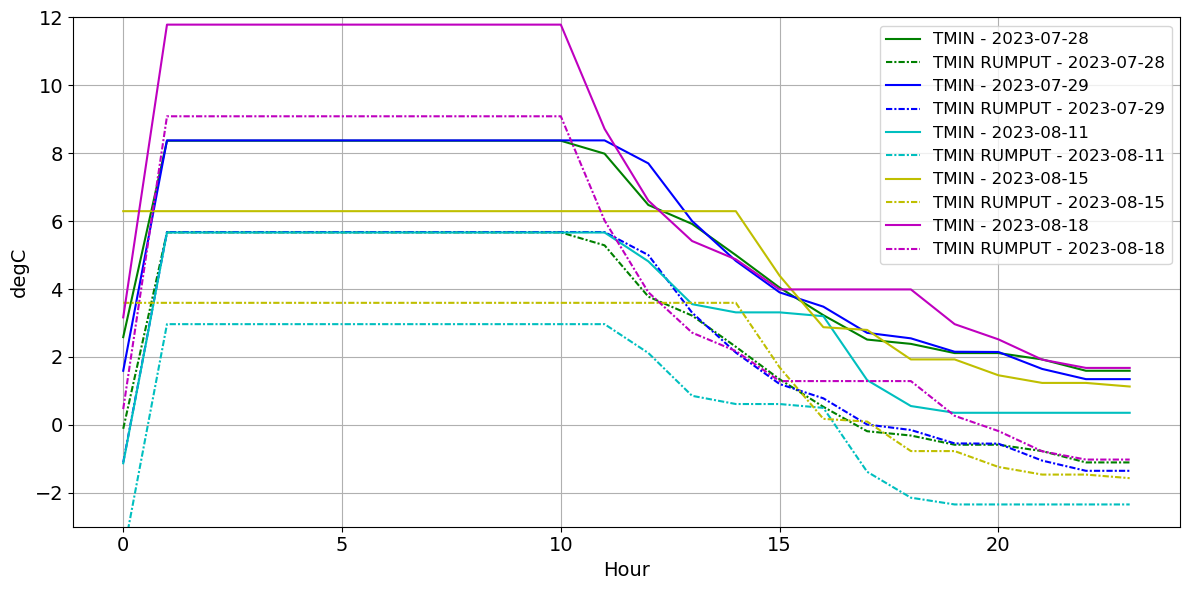

In [94]:

from datetime import datetime, timedelta

data_min = df_extrapolate[['TT AIR MIN', 'TT AIR MIN GRASS', 'Hour']].resample('H').min()
#data2 = df_extrapolate[['TT AIR MIN GRASS']].resample('H').min()
data_avg = df_extrapolate[['SR AVG', 'WS AVG', 'PP AIR', 'Hour']].resample('H').mean()
#data4 = df_extrapolate[['WD AVG']].resample('D').min()
# data5 = df_extrapolate[['WS AVG', 'Hour']].resample('H').mean()
# data6 = df_extrapolate[['PP AIR', 'Hour']].resample('H').mean()


# Specify the start and end dates of the selected time range
start_date1 = '2023-07-27'
end_date1 = start_date1

start_date2 = '2023-07-28'
end_date2 = start_date2

start_date3 = '2023-08-10'
end_date3 = start_date3

start_date4 = '2023-08-14'
end_date4 = start_date4

start_date5 = '2023-08-17'
end_date5 = start_date5



# Convert the start_date string to a datetime object
start_date_1 = datetime.strptime(start_date1, '%Y-%m-%d')
# Add 1 day to the start date
tomorrow1 = start_date_1 + timedelta(days=1)

# Convert the start_date string to a datetime object
start_date_2 = datetime.strptime(start_date2, '%Y-%m-%d')
# Add 1 day to the start date
tomorrow2 = start_date_2 + timedelta(days=1)

# Convert the start_date string to a datetime object
start_date_3 = datetime.strptime(start_date3, '%Y-%m-%d')
# Add 1 day to the start date
tomorrow3 = start_date_3 + timedelta(days=1)

# Convert the start_date string to a datetime object
start_date_4 = datetime.strptime(start_date4, '%Y-%m-%d')
# Add 1 day to the start date
tomorrow4 = start_date_4 + timedelta(days=1)

# Convert the start_date string to a datetime object
start_date_5 = datetime.strptime(start_date5, '%Y-%m-%d')
# Add 1 day to the start date
tomorrow5 = start_date_5 + timedelta(days=1)




# Filter data1 for the selected time range
selected_data_avg1 = data_min.loc[start_date1:end_date1]
selected_data_avg2 = data_min.loc[start_date2:end_date2]
selected_data_avg3 = data_min.loc[start_date3:end_date3]
selected_data_avg4 = data_min.loc[start_date4:end_date4]
selected_data_avg5 = data_min.loc[start_date5:end_date5]
# selected_data_avg1 = data_avg.loc[start_date:end_date]

# Create a figure
plt.figure(figsize=(12, 6))
# Plot the DataFrame, including the index
#plt.plot(df1_tmin_1.index, df1_tmin_1['TT AIR MIN'], label='TMIN')
# plt.subplot(4, 1, 1)
plt.plot(selected_data_avg1['Hour'], selected_data_avg1['TT AIR MIN'], label=f'TMIN - {tomorrow1.strftime("%Y-%m-%d")}', color='g', linestyle='-')
plt.plot(selected_data_avg1['Hour'], selected_data_avg1['TT AIR MIN GRASS'], label=f'TMIN RUMPUT - {tomorrow1.strftime("%Y-%m-%d")}', color='g', linestyle=(0,(3,1,1,1)))
plt.plot(selected_data_avg2['Hour'], selected_data_avg2['TT AIR MIN'], label=f'TMIN - {tomorrow2.strftime("%Y-%m-%d")}', color='b', linestyle='-')
plt.plot(selected_data_avg2['Hour'], selected_data_avg2['TT AIR MIN GRASS'], label=f'TMIN RUMPUT - {tomorrow2.strftime("%Y-%m-%d")}', color='b', linestyle=(0,(3,1,1,1)))
plt.plot(selected_data_avg3['Hour'], selected_data_avg3['TT AIR MIN'], label=f'TMIN - {tomorrow3.strftime("%Y-%m-%d")}', color='c', linestyle='-')
plt.plot(selected_data_avg3['Hour'], selected_data_avg3['TT AIR MIN GRASS'], label=f'TMIN RUMPUT - {tomorrow3.strftime("%Y-%m-%d")}', color='c', linestyle=(0,(3,1,1,1)))
plt.plot(selected_data_avg4['Hour'], selected_data_avg4['TT AIR MIN'], label=f'TMIN - {tomorrow4.strftime("%Y-%m-%d")}', color='y', linestyle='-')
plt.plot(selected_data_avg4['Hour'], selected_data_avg4['TT AIR MIN GRASS'], label=f'TMIN RUMPUT - {tomorrow4.strftime("%Y-%m-%d")}', color='y', linestyle=(0,(3,1,1,1)))
plt.plot(selected_data_avg5['Hour'], selected_data_avg5['TT AIR MIN'], label=f'TMIN - {tomorrow5.strftime("%Y-%m-%d")}', color='m', linestyle='-')
plt.plot(selected_data_avg5['Hour'], selected_data_avg5['TT AIR MIN GRASS'], label=f'TMIN RUMPUT - {tomorrow5.strftime("%Y-%m-%d")}', color='m', linestyle=(0,(3,1,1,1)))
plt.ylim(-3, 12)
# Customize the plot
# plt.title('Climagram Fenomena Es TMIN')
plt.xlabel('Hour', fontsize=14)
plt.ylabel('degC', fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Show the plot
#plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure all elements fit within the figure area
plt.show()

In [95]:
selected_data_avg1

TT AIR MIN  TT AIR MIN GRASS  Hour
TIMESTAMP                                                    
2023-07-27 00:00:00+00:00       2.585            -0.115   0.0
2023-07-27 01:00:00+00:00       8.370             5.670   1.0
2023-07-27 02:00:00+00:00       8.370             5.670   2.0
2023-07-27 03:00:00+00:00       8.370             5.670   3.0
2023-07-27 04:00:00+00:00       8.370             5.670   4.0
2023-07-27 05:00:00+00:00       8.370             5.670   5.0
2023-07-27 06:00:00+00:00       8.370             5.670   6.0
2023-07-27 07:00:00+00:00       8.370             5.670   7.0
2023-07-27 08:00:00+00:00       8.370             5.670   8.0
2023-07-27 09:00:00+00:00       8.370             5.670   9.0
2023-07-27 10:00:00+00:00       8.370             5.670  10.0
2023-07-27 11:00:00+00:00       7.989             5.289  11.0
2023-07-27 12:00:00+00:00       6.478             3.778  12.0
2023-07-27 13:00:00+00:00       5.919             3.219  13.0
2023-07-27 14:00:00+00:00       5.000             2.300  14.0
2023-07-27 15:00:00+00:00       4.043             1.343  15.0
2023-07-27 16:00:00+00:00       3.231             0.531  16.0
2023-07-27 17:00:00+00:00       2.513            -0.187  17.0
2023-07-27 18:00:00+00:00       2.386            -0.314  18.0
2023-07-27 19:00:00+00:00       2.115            -0.585  19.0
2023-07-27 20:00:00+00:00       2.115            -0.585  20.0
2023-07-27 21:00:00+00:00       1.928            -0.772  21.0
2023-07-27 22:00:00+00:00       1.594            -1.106  22.0
2023-07-27 23:00:00+00:00       1.594            -1.106  23.0

In [156]:
from datetime import datetime, timedelta

data_min = df_extrapolate[['TT AIR MIN', 'TT AIR MIN GRASS', 'Hour']].resample('H').min()
#data2 = df_extrapolate[['TT AIR MIN GRASS']].resample('H').min()
data_avg = df_extrapolate[['SR AVG', 'WS AVG', 'PP AIR', 'Hour']].resample('H').mean()
#data4 = df_extrapolate[['WD AVG']].resample('D').min()
# data5 = df_extrapolate[['WS AVG', 'Hour']].resample('H').mean()
# data6 = df_extrapolate[['PP AIR', 'Hour']].resample('H').mean()


# Specify the start and end dates of the selected time range
start_date1 = '2023-07-27'
end_date1 = start_date1

start_date2 = '2023-07-28'
end_date2 = start_date2

start_date3 = '2023-08-10'
end_date3 = start_date3

start_date4 = '2023-08-14'
end_date4 = start_date4

start_date5 = '2023-08-17'
end_date5 = start_date5


# Convert the start_date string to a datetime object
start_date_1 = datetime.strptime(start_date1, '%Y-%m-%d')
# Add 1 day to the start date
tomorrow1 = start_date_1 + timedelta(days=1)

# Convert the start_date string to a datetime object
start_date_2 = datetime.strptime(start_date2, '%Y-%m-%d')
# Add 1 day to the start date
tomorrow2 = start_date_2 + timedelta(days=1)

# Convert the start_date string to a datetime object
start_date_3 = datetime.strptime(start_date3, '%Y-%m-%d')
# Add 1 day to the start date
tomorrow3 = start_date_3 + timedelta(days=1)

# Convert the start_date string to a datetime object
start_date_4 = datetime.strptime(start_date4, '%Y-%m-%d')
# Add 1 day to the start date
tomorrow4 = start_date_4 + timedelta(days=1)

# Convert the start_date string to a datetime object
start_date_5 = datetime.strptime(start_date5, '%Y-%m-%d')
# Add 1 day to the start date
tomorrow5 = start_date_5 + timedelta(days=1)




# Filter data1 for the selected time range
selected_data_avg1 = data_min.loc[start_date1:end_date1]
selected_data_avg2 = data_min.loc[start_date2:end_date2]
selected_data_avg3 = data_min.loc[start_date3:end_date3]
selected_data_avg4 = data_min.loc[start_date4:end_date4]
selected_data_avg5 = data_min.loc[start_date5:end_date5]
# selected_data_avg1 = data_avg.loc[start_date:end_date]

# Select columns to concatenate
selected_data_avg1 = selected_data_avg1.reset_index(drop=True)
selected_columns_df1 = selected_data_avg1[['TT AIR MIN']]
selected_data_avg2 = selected_data_avg2.reset_index(drop=True)
selected_columns_df2 = selected_data_avg2[['TT AIR MIN']]
selected_data_avg3 = selected_data_avg3.reset_index(drop=True)
selected_columns_df3 = selected_data_avg3[['TT AIR MIN']]
selected_data_avg4 = selected_data_avg4.reset_index(drop=True)
selected_columns_df4 = selected_data_avg4[['TT AIR MIN']]
selected_data_avg5 = selected_data_avg5.reset_index(drop=True)
selected_columns_df5 = selected_data_avg5[['TT AIR MIN']]


# Concatenate along columns with index=False
result = pd.concat([selected_columns_df1, selected_columns_df2, 
                    selected_columns_df3, selected_columns_df4, selected_columns_df5], axis=1, ignore_index=False)

# Calculate the average of each row
row_averages = result.mean(axis=1)

# Add a new column with the row averages
result['Row_Averages'] = row_averages

result

TT AIR MIN  TT AIR MIN  TT AIR MIN  TT AIR MIN  TT AIR MIN  Row_Averages
0        2.585       1.594      -1.130       6.295       3.167        2.5022
1        8.370       8.380       5.667       6.295      11.790        8.1004
2        8.370       8.380       5.667       6.295      11.790        8.1004
3        8.370       8.380       5.667       6.295      11.790        8.1004
4        8.370       8.380       5.667       6.295      11.790        8.1004
5        8.370       8.380       5.667       6.295      11.790        8.1004
6        8.370       8.380       5.667       6.295      11.790        8.1004
7        8.370       8.380       5.667       6.295      11.790        8.1004
8        8.370       8.380       5.667       6.295      11.790        8.1004
9        8.370       8.380       5.667       6.295      11.790        8.1004
10       8.370       8.380       5.667       6.295      11.790        8.1004
11       7.989       8.380       5.667       6.295       8.720        7.4102
12       6.478       7.703       4.817       6.295       6.607        6.3800
13       5.919       6.005       3.556       6.295       5.416        5.4382
14       5.000       4.830       3.314       6.295       4.875        4.8628
15       4.043       3.903       3.314       4.394       3.990        3.9288
16       3.231       3.482       3.201       2.877       3.990        3.3562
17       2.513       2.711       1.319       2.797       3.990        2.6660
18       2.386       2.549       0.555       1.928       3.990        2.2816
19       2.115       2.154       0.356       1.928       2.967        1.9040
20       2.115       2.147       0.356       1.461       2.519        1.7196
21       1.928       1.648       0.356       1.236       1.922        1.4180
22       1.594       1.347       0.356       1.236       1.678        1.2422
23       1.594       1.347       0.356       1.130       1.678        1.2210

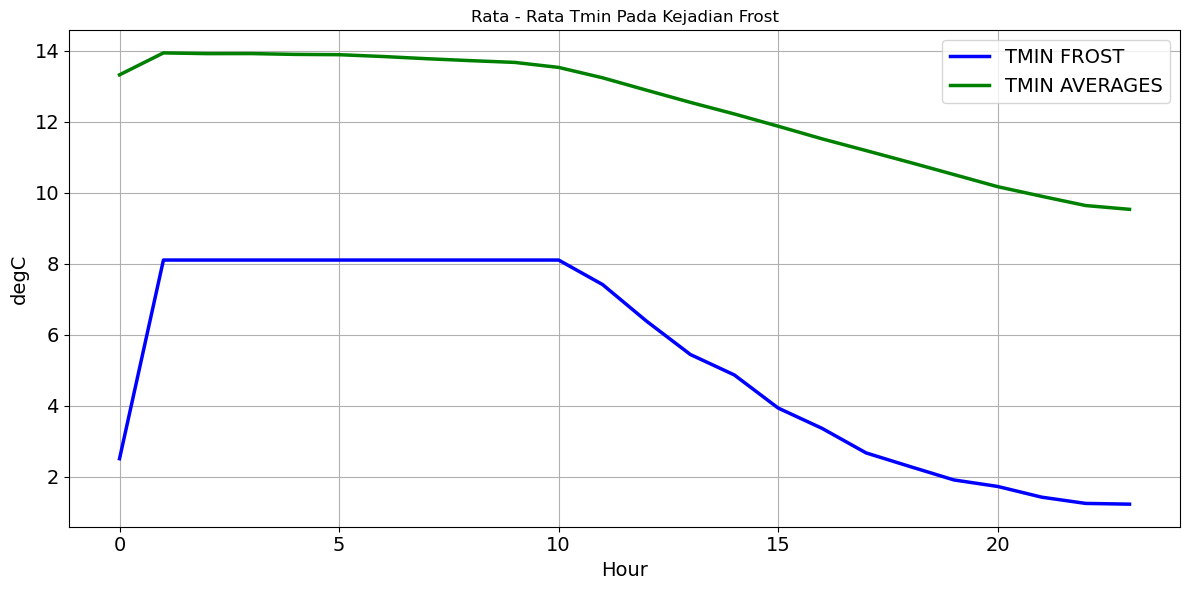

In [161]:
plt.figure(figsize=(12, 6))
plt.plot(selected_data_avg1['Hour'], result['Row_Averages'], label=f'TMIN FROST', color='b', linestyle='-', lw=2.5)
plt.plot(selected_data_avg1['Hour'], hourly_average['TT AIR MIN'], label=f'TMIN AVERAGES', color='g', linestyle='-', lw=2.5)
# Customize the plot
plt.title('Rata - Rata Tmin Pada Kejadian Frost')
plt.xlabel('Hour', fontsize=14)
plt.ylabel('degC', fontsize=14)
plt.grid(True)
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Show the plot
#plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure all elements fit within the figure area
plt.show()

In [120]:
# Specify the start and end dates of the selected time range
start_date1 = '2023-02-27'
end_date1 = start_date1

start_date2 = '2023-01-02'
end_date2 = start_date2

start_date3 = '2022-12-10'
end_date3 = start_date3

start_date4 = '2023-06-14'
end_date4 = start_date4

start_date5 = '2022-11-17'
end_date5 = start_date5



# Convert the start_date string to a datetime object
start_date_1 = datetime.strptime(start_date1, '%Y-%m-%d')
# Add 1 day to the start date
tomorrow1 = start_date_1 + timedelta(days=1)

# Convert the start_date string to a datetime object
start_date_2 = datetime.strptime(start_date2, '%Y-%m-%d')
# Add 1 day to the start date
tomorrow2 = start_date_2 + timedelta(days=1)

# Convert the start_date string to a datetime object
start_date_3 = datetime.strptime(start_date3, '%Y-%m-%d')
# Add 1 day to the start date
tomorrow3 = start_date_3 + timedelta(days=1)

# Convert the start_date string to a datetime object
start_date_4 = datetime.strptime(start_date4, '%Y-%m-%d')
# Add 1 day to the start date
tomorrow4 = start_date_4 + timedelta(days=1)

# Convert the start_date string to a datetime object
start_date_5 = datetime.strptime(start_date5, '%Y-%m-%d')
# Add 1 day to the start date
tomorrow5 = start_date_5 + timedelta(days=1)




# Filter data1 for the selected time range
selected_data_avg1 = data_min.loc[start_date1:end_date1]
selected_data_avg2 = data_min.loc[start_date2:end_date2]
selected_data_avg3 = data_min.loc[start_date3:end_date3]
selected_data_avg4 = data_min.loc[start_date4:end_date4]
selected_data_avg5 = data_min.loc[start_date5:end_date5]
# selected_data_avg1 = data_avg.loc[start_date:end_date]

# Select columns to concatenate
selected_data_avg1 = selected_data_avg1.reset_index(drop=True)
selected_columns_df1 = selected_data_avg1[['TT AIR MIN']]
selected_data_avg2 = selected_data_avg2.reset_index(drop=True)
selected_columns_df2 = selected_data_avg2[['TT AIR MIN']]
selected_data_avg3 = selected_data_avg3.reset_index(drop=True)
selected_columns_df3 = selected_data_avg3[['TT AIR MIN']]
selected_data_avg4 = selected_data_avg4.reset_index(drop=True)
selected_columns_df4 = selected_data_avg4[['TT AIR MIN']]
selected_data_avg5 = selected_data_avg5.reset_index(drop=True)
selected_columns_df5 = selected_data_avg5[['TT AIR MIN']]


# Concatenate along columns with index=False
result1 = pd.concat([selected_columns_df1, selected_columns_df2, 
                    selected_columns_df3, selected_columns_df4, selected_columns_df5], axis=1, ignore_index=False)

# Calculate the average of each row
row_averages = result1.mean(axis=1)

# Add a new column with the row averages
result1['Row_Averages'] = row_averages

result1

TT AIR MIN  TT AIR MIN  TT AIR MIN  TT AIR MIN  TT AIR MIN  Row_Averages
0        13.70       13.13       10.74       10.22       14.69        12.496
1        14.00       13.22       12.21       16.66       14.69        14.156
2        14.00       13.22       12.21       16.66       14.69        14.156
3        14.00       13.22       12.21       16.66       14.69        14.156
4        14.00       13.22       12.21       16.66       14.69        14.156
5        13.97       13.22       12.21       16.66       14.69        14.150
6        13.97       13.22       12.21       16.66       14.69        14.150
7        13.96       13.22       12.21       16.66       14.39        14.088
8        13.39       13.22       12.21       16.66       14.39        13.974
9        13.05       13.22       12.21       16.03       14.39        13.780
10       13.05       13.22       12.21       14.88       14.39        13.550
11       13.05       13.22       12.21       14.88       14.39        13.550
12       13.05       13.22       12.21       13.87       14.39        13.348
13       13.05       13.22       12.21       11.81       14.39        12.936
14       13.05       13.22       11.37       10.73       14.39        12.552
15       13.05       13.22       11.14       10.00       14.39        12.360
16       13.05       13.07       11.14        9.88       14.39        12.306
17       13.05       13.01       11.14        9.88       14.39        12.294
18       13.05       13.01       10.56        9.88       14.39        12.178
19       13.05       13.01        9.76        9.01       14.39        11.844
20       13.05       12.91        9.45        8.70       14.39        11.700
21       13.05       12.91        8.88        8.70       14.39        11.586
22       13.05       12.91        8.88        8.55       14.39        11.556
23       13.05       12.91        8.88        8.55       14.39        11.556

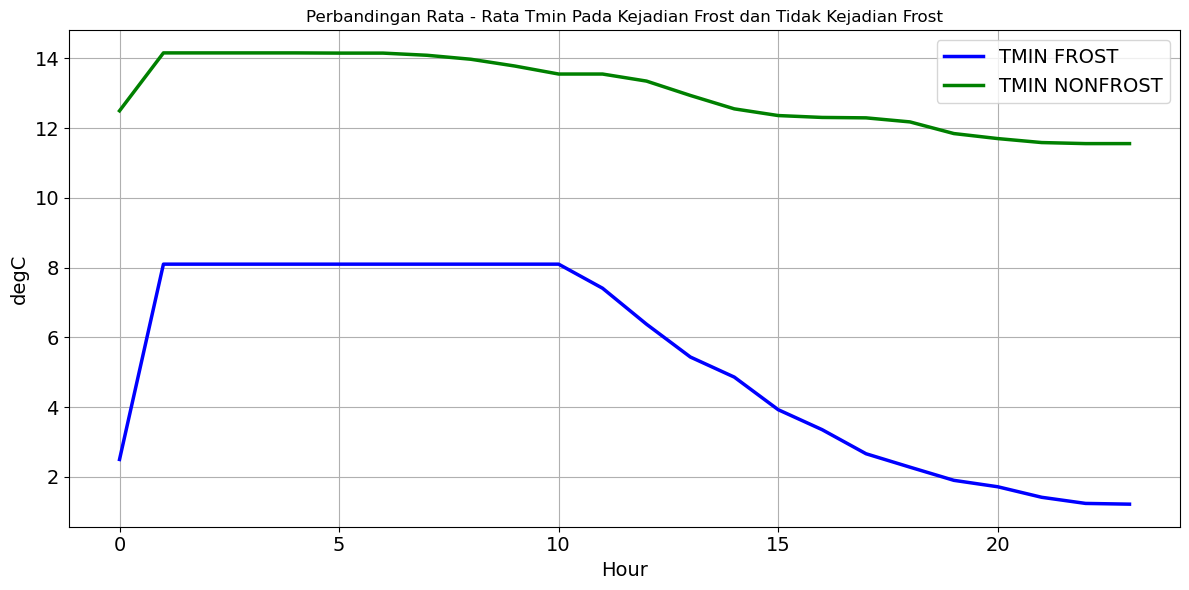

In [123]:
plt.figure(figsize=(12, 6))
plt.plot(selected_data_avg1['Hour'], result['Row_Averages'], label=f'TMIN FROST', color='b', linestyle='-', lw=2.5)
plt.plot(selected_data_avg1['Hour'], result1['Row_Averages'], label=f'TMIN NONFROST', color='g', linestyle='-', lw=2.5)
# Customize the plot
plt.title('Perbandingan Rata - Rata Tmin Pada Kejadian Frost dan Tidak Kejadian Frost')
plt.xlabel('Hour', fontsize=14)
plt.ylabel('degC', fontsize=14)
plt.grid(True)
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Show the plot
#plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure all elements fit within the figure area
plt.show()

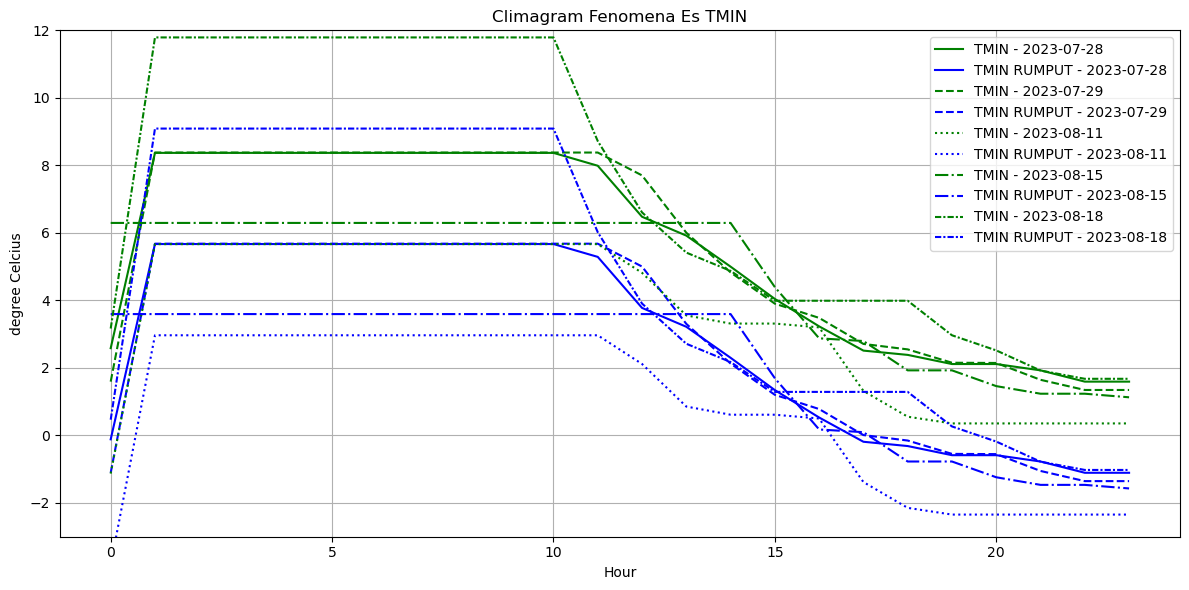

In [ ]:

from datetime import datetime, timedelta

data_min = df_extrapolate[['TT AIR MIN', 'TT AIR MIN GRASS', 'Hour']].resample('H').min()
#data2 = df_extrapolate[['TT AIR MIN GRASS']].resample('H').min()
data_avg = df_extrapolate[['SR AVG', 'WS AVG', 'PP AIR', 'Hour']].resample('H').mean()
#data4 = df_extrapolate[['WD AVG']].resample('D').min()
# data5 = df_extrapolate[['WS AVG', 'Hour']].resample('H').mean()
# data6 = df_extrapolate[['PP AIR', 'Hour']].resample('H').mean()


# Specify the start and end dates of the selected time range
start_date1 = '2023-07-27'
end_date1 = start_date1

start_date2 = '2023-07-28'
end_date2 = start_date2

start_date3 = '2023-08-10'
end_date3 = start_date3

start_date4 = '2023-08-14'
end_date4 = start_date4

start_date5 = '2023-08-17'
end_date5 = start_date5



# Convert the start_date string to a datetime object
start_date_1 = datetime.strptime(start_date1, '%Y-%m-%d')
# Add 1 day to the start date
tomorrow1 = start_date_1 + timedelta(days=1)

# Convert the start_date string to a datetime object
start_date_2 = datetime.strptime(start_date2, '%Y-%m-%d')
# Add 1 day to the start date
tomorrow2 = start_date_2 + timedelta(days=1)

# Convert the start_date string to a datetime object
start_date_3 = datetime.strptime(start_date3, '%Y-%m-%d')
# Add 1 day to the start date
tomorrow3 = start_date_3 + timedelta(days=1)

# Convert the start_date string to a datetime object
start_date_4 = datetime.strptime(start_date4, '%Y-%m-%d')
# Add 1 day to the start date
tomorrow4 = start_date_4 + timedelta(days=1)

# Convert the start_date string to a datetime object
start_date_5 = datetime.strptime(start_date5, '%Y-%m-%d')
# Add 1 day to the start date
tomorrow5 = start_date_5 + timedelta(days=1)




# Filter data1 for the selected time range
selected_data_avg1 = data_min.loc[start_date1:end_date1]
selected_data_avg2 = data_min.loc[start_date2:end_date2]
selected_data_avg3 = data_min.loc[start_date3:end_date3]
selected_data_avg4 = data_min.loc[start_date4:end_date4]
selected_data_avg5 = data_min.loc[start_date5:end_date5]
# selected_data_avg1 = data_avg.loc[start_date:end_date]

# Create a figure
plt.figure(figsize=(12, 6))
# Plot the DataFrame, including the index
#plt.plot(df1_tmin_1.index, df1_tmin_1['TT AIR MIN'], label='TMIN')
# plt.subplot(4, 1, 1)
plt.plot(selected_data_avg1['Hour'], selected_data_avg1['TT AIR MIN'], label=f'TMIN - {tomorrow1.strftime("%Y-%m-%d")}', color='g', linestyle='-')
plt.plot(selected_data_avg1['Hour'], selected_data_avg1['TT AIR MIN GRASS'], label=f'TMIN RUMPUT - {tomorrow1.strftime("%Y-%m-%d")}', color='b', linestyle='-')
plt.plot(selected_data_avg2['Hour'], selected_data_avg2['TT AIR MIN'], label=f'TMIN - {tomorrow2.strftime("%Y-%m-%d")}', color='g', linestyle='--')
plt.plot(selected_data_avg2['Hour'], selected_data_avg2['TT AIR MIN GRASS'], label=f'TMIN RUMPUT - {tomorrow2.strftime("%Y-%m-%d")}', color='b', linestyle='--')
plt.plot(selected_data_avg3['Hour'], selected_data_avg3['TT AIR MIN'], label=f'TMIN - {tomorrow3.strftime("%Y-%m-%d")}', color='g', linestyle=':')
plt.plot(selected_data_avg3['Hour'], selected_data_avg3['TT AIR MIN GRASS'], label=f'TMIN RUMPUT - {tomorrow3.strftime("%Y-%m-%d")}', color='b', linestyle=':')
plt.plot(selected_data_avg4['Hour'], selected_data_avg4['TT AIR MIN'], label=f'TMIN - {tomorrow4.strftime("%Y-%m-%d")}', color='g', linestyle='-.')
plt.plot(selected_data_avg4['Hour'], selected_data_avg4['TT AIR MIN GRASS'], label=f'TMIN RUMPUT - {tomorrow4.strftime("%Y-%m-%d")}', color='b', linestyle='-.')
plt.plot(selected_data_avg5['Hour'], selected_data_avg5['TT AIR MIN'], label=f'TMIN - {tomorrow5.strftime("%Y-%m-%d")}', color='g', linestyle=(0,(3,1,1,1)))
plt.plot(selected_data_avg5['Hour'], selected_data_avg5['TT AIR MIN GRASS'], label=f'TMIN RUMPUT - {tomorrow5.strftime("%Y-%m-%d")}', color='b', linestyle=(0,(3,1,1,1)))
plt.ylim(-3, 12)
# Customize the plot
plt.title('Climagram Fenomena Es TMIN')
plt.xlabel('Hour')
plt.ylabel('degree Celcius')
plt.grid(True)
plt.legend()

# Show the plot
#plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure all elements fit within the figure area
plt.show()

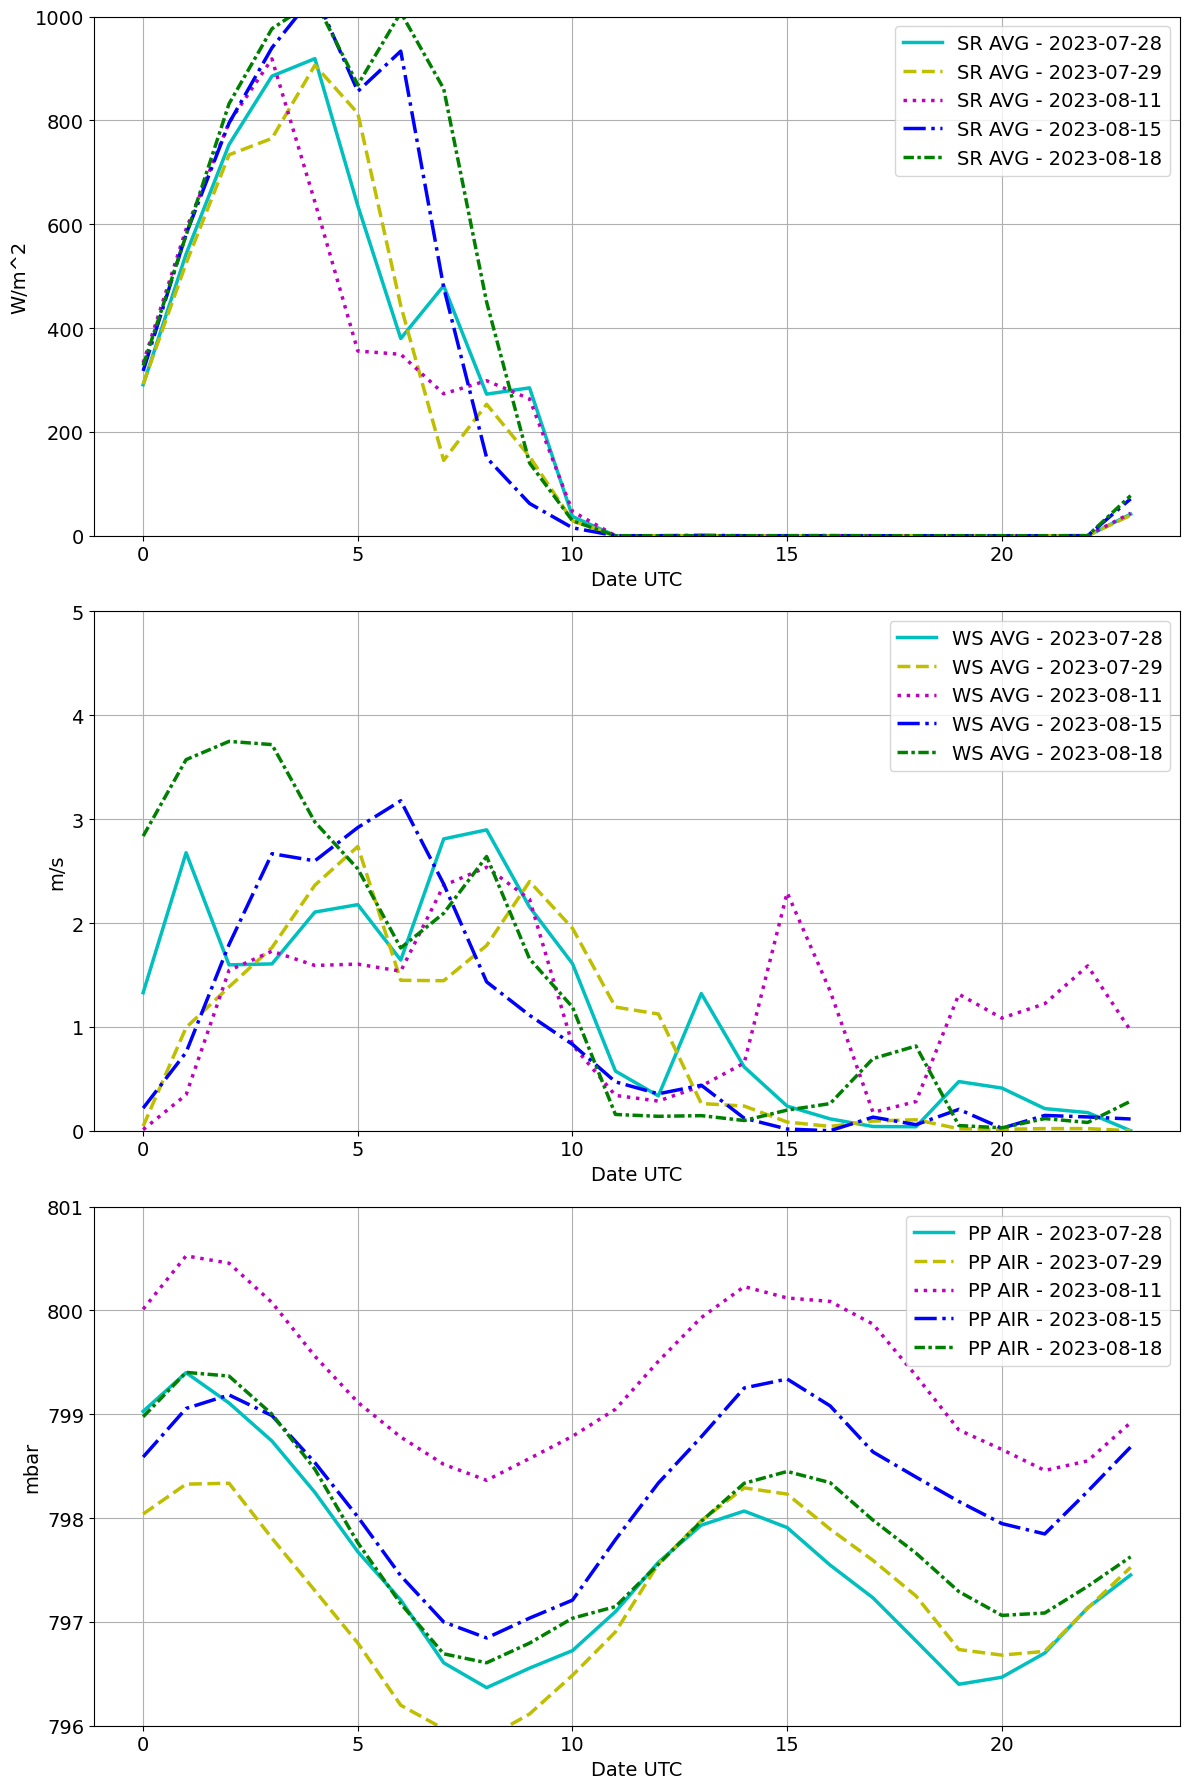

In [63]:

from datetime import datetime, timedelta

data_min = df_extrapolate[['TT AIR MIN', 'TT AIR MIN GRASS', 'Hour']].resample('H').min()
#data2 = df_extrapolate[['TT AIR MIN GRASS']].resample('H').min()
data_avg = df_extrapolate[['SR AVG', 'WS AVG', 'PP AIR', 'Hour']].resample('H').mean()
#data4 = df_extrapolate[['WD AVG']].resample('D').min()
# data5 = df_extrapolate[['WS AVG', 'Hour']].resample('H').mean()
# data6 = df_extrapolate[['PP AIR', 'Hour']].resample('H').mean()


# Specify the start and end dates of the selected time range
start_date1 = '2023-07-27'
end_date1 = start_date1

start_date2 = '2023-07-28'
end_date2 = start_date2

start_date3 = '2023-08-10'
end_date3 = start_date3

start_date4 = '2023-08-14'
end_date4 = start_date4

start_date5 = '2023-08-17'
end_date5 = start_date5



# Convert the start_date string to a datetime object
start_date_1 = datetime.strptime(start_date1, '%Y-%m-%d')
# Add 1 day to the start date
tomorrow1 = start_date_1 + timedelta(days=1)

# Convert the start_date string to a datetime object
start_date_2 = datetime.strptime(start_date2, '%Y-%m-%d')
# Add 1 day to the start date
tomorrow2 = start_date_2 + timedelta(days=1)

# Convert the start_date string to a datetime object
start_date_3 = datetime.strptime(start_date3, '%Y-%m-%d')
# Add 1 day to the start date
tomorrow3 = start_date_3 + timedelta(days=1)

# Convert the start_date string to a datetime object
start_date_4 = datetime.strptime(start_date4, '%Y-%m-%d')
# Add 1 day to the start date
tomorrow4 = start_date_4 + timedelta(days=1)

# Convert the start_date string to a datetime object
start_date_5 = datetime.strptime(start_date5, '%Y-%m-%d')
# Add 1 day to the start date
tomorrow5 = start_date_5 + timedelta(days=1)




# Filter data1 for the selected time range
selected_data_avg1 = data_avg.loc[start_date1:end_date1]
selected_data_avg2 = data_avg.loc[start_date2:end_date2]
selected_data_avg3 = data_avg.loc[start_date3:end_date3]
selected_data_avg4 = data_avg.loc[start_date4:end_date4]
selected_data_avg5 = data_avg.loc[start_date5:end_date5]
# selected_data_avg1 = data_avg.loc[start_date:end_date]

# Create a figure
plt.figure(figsize=(12, 18))
# Plot the DataFrame, including the index
#plt.plot(df1_tmin_1.index, df1_tmin_1['TT AIR MIN'], label='TMIN')
plt.subplot(3, 1, 1)
plt.plot(selected_data_avg1['Hour'], selected_data_avg1['SR AVG'], label=f'SR AVG - {tomorrow1.strftime("%Y-%m-%d")}', color='c', linestyle='-', lw=2.5)
plt.plot(selected_data_avg2['Hour'], selected_data_avg2['SR AVG'], label=f'SR AVG - {tomorrow2.strftime("%Y-%m-%d")}', color='y', linestyle='--', lw=2.5)
plt.plot(selected_data_avg3['Hour'], selected_data_avg3['SR AVG'], label=f'SR AVG - {tomorrow3.strftime("%Y-%m-%d")}', color='m', linestyle=':', lw=2.5)
plt.plot(selected_data_avg4['Hour'], selected_data_avg4['SR AVG'], label=f'SR AVG - {tomorrow4.strftime("%Y-%m-%d")}', color='b', linestyle='-.', lw=2.5)
plt.plot(selected_data_avg5['Hour'], selected_data_avg5['SR AVG'], label=f'SR AVG - {tomorrow5.strftime("%Y-%m-%d")}', color='g', linestyle=(0,(3,1,1,1)), lw=2.5)
plt.ylim(0, 1000)
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('W/m^2', fontsize=14)
plt.xlabel('Date UTC', fontsize=14)

# Customize the plot
# plt.title('Climagram Fenomena Es')
# plt.xlabel('Hour')
plt.grid(True)


plt.subplot(3, 1, 2)
plt.plot(selected_data_avg1['Hour'], selected_data_avg1['WS AVG'], label=f'WS AVG - {tomorrow1.strftime("%Y-%m-%d")}', color='c', linestyle='-', lw=2.5)
plt.plot(selected_data_avg2['Hour'], selected_data_avg2['WS AVG'], label=f'WS AVG - {tomorrow2.strftime("%Y-%m-%d")}', color='y', linestyle='--', lw=2.5)
plt.plot(selected_data_avg3['Hour'], selected_data_avg3['WS AVG'], label=f'WS AVG - {tomorrow3.strftime("%Y-%m-%d")}', color='m', linestyle=':', lw=2.5)
plt.plot(selected_data_avg4['Hour'], selected_data_avg4['WS AVG'], label=f'WS AVG - {tomorrow4.strftime("%Y-%m-%d")}', color='b', linestyle='-.', lw=2.5)
plt.plot(selected_data_avg5['Hour'], selected_data_avg5['WS AVG'], label=f'WS AVG - {tomorrow5.strftime("%Y-%m-%d")}', color='g', linestyle=(0,(3,1,1,1)), lw=2.5)
plt.ylim(0, 5)
plt.grid(True)
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('m/s', fontsize=14)
plt.xlabel('Date UTC', fontsize=14)

plt.subplot(3, 1, 3)
plt.plot(selected_data_avg1['Hour'], selected_data_avg1['PP AIR'], label=f'PP AIR - {tomorrow1.strftime("%Y-%m-%d")}', color='c', linestyle='-', lw=2.5)
plt.plot(selected_data_avg2['Hour'], selected_data_avg2['PP AIR'], label=f'PP AIR - {tomorrow2.strftime("%Y-%m-%d")}', color='y', linestyle='--', lw=2.5)
plt.plot(selected_data_avg3['Hour'], selected_data_avg3['PP AIR'], label=f'PP AIR - {tomorrow3.strftime("%Y-%m-%d")}', color='m', linestyle=':', lw=2.5)
plt.plot(selected_data_avg4['Hour'], selected_data_avg4['PP AIR'], label=f'PP AIR - {tomorrow4.strftime("%Y-%m-%d")}', color='b', linestyle='-.', lw=2.5)
plt.plot(selected_data_avg5['Hour'], selected_data_avg5['PP AIR'], label=f'PP AIR - {tomorrow5.strftime("%Y-%m-%d")}', color='g', linestyle=(0,(3,1,1,1)), lw=2.5)
plt.ylim(796, 801)
plt.ylabel('mbar', fontsize=14)


# plt.ylabel('degree Celcius')
plt.grid(True)
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.xlabel('Date UTC', fontsize=14)

# Show the plot
#plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure all elements fit within the figure area
plt.show()

### FROST

In [162]:
hourly_average.columns

Index(['TT AIR MIN', 'TT AIR MIN GRASS', 'SR AVG', 'WD AVG', 'WS AVG',
       'PP AIR', 'TANGGAL', 'Hour', 'Month'],
      dtype='object')

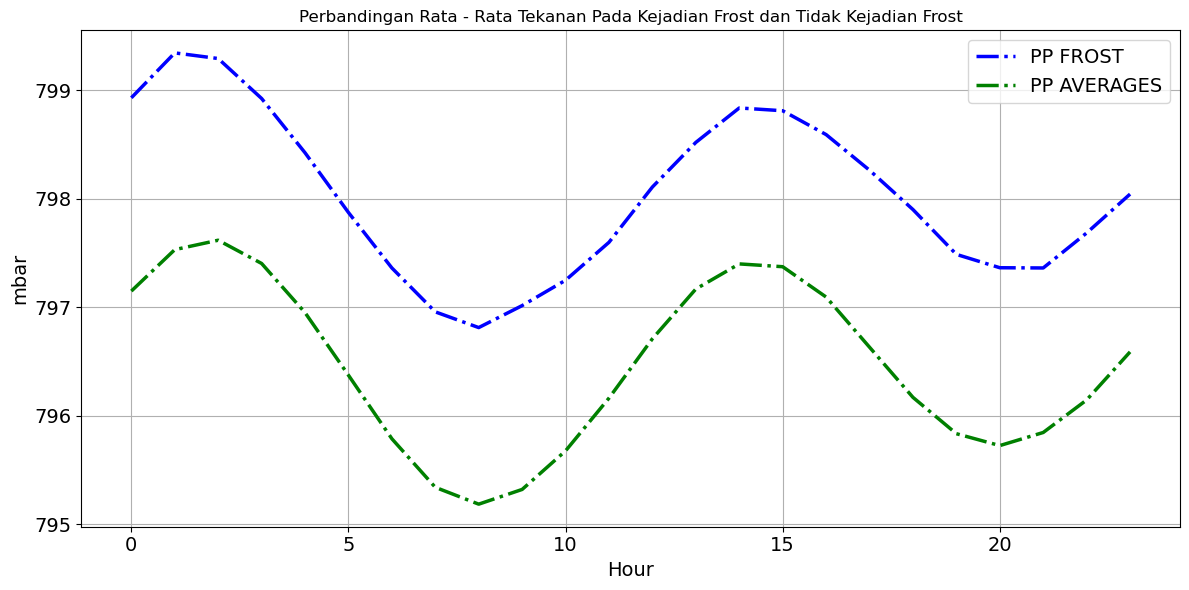

In [176]:
####################################################### FROST #########################################################################
variable = 'PP AIR'
# Specify the start and end dates of the selected time range (FROST)
start_date1 = '2023-07-27'
end_date1 = start_date1

start_date2 = '2023-07-28'
end_date2 = start_date2

start_date3 = '2023-08-10'
end_date3 = start_date3

start_date4 = '2023-08-14'
end_date4 = start_date4

start_date5 = '2023-08-17'
end_date5 = start_date5



# Convert the start_date string to a datetime object
start_date_1 = datetime.strptime(start_date1, '%Y-%m-%d')
# Add 1 day to the start date
tomorrow1 = start_date_1 + timedelta(days=1)

# Convert the start_date string to a datetime object
start_date_2 = datetime.strptime(start_date2, '%Y-%m-%d')
# Add 1 day to the start date
tomorrow2 = start_date_2 + timedelta(days=1)

# Convert the start_date string to a datetime object
start_date_3 = datetime.strptime(start_date3, '%Y-%m-%d')
# Add 1 day to the start date
tomorrow3 = start_date_3 + timedelta(days=1)

# Convert the start_date string to a datetime object
start_date_4 = datetime.strptime(start_date4, '%Y-%m-%d')
# Add 1 day to the start date
tomorrow4 = start_date_4 + timedelta(days=1)

# Convert the start_date string to a datetime object
start_date_5 = datetime.strptime(start_date5, '%Y-%m-%d')
# Add 1 day to the start date
tomorrow5 = start_date_5 + timedelta(days=1)




# Filter data1 for the selected time range
selected_data_avg1 = data_avg.loc[start_date1:end_date1]
selected_data_avg2 = data_avg.loc[start_date2:end_date2]
selected_data_avg3 = data_avg.loc[start_date3:end_date3]
selected_data_avg4 = data_avg.loc[start_date4:end_date4]
selected_data_avg5 = data_avg.loc[start_date5:end_date5]

# Select columns to concatenate
selected_data_avg1 = selected_data_avg1.reset_index(drop=True)
selected_columns_df1 = selected_data_avg1[[variable]]
selected_data_avg2 = selected_data_avg2.reset_index(drop=True)
selected_columns_df2 = selected_data_avg2[[variable]]
selected_data_avg3 = selected_data_avg3.reset_index(drop=True)
selected_columns_df3 = selected_data_avg3[[variable]]
selected_data_avg4 = selected_data_avg4.reset_index(drop=True)
selected_columns_df4 = selected_data_avg4[[variable]]
selected_data_avg5 = selected_data_avg5.reset_index(drop=True)
selected_columns_df5 = selected_data_avg5[[variable]]

# Concatenate along columns with index=False
result = pd.concat([selected_columns_df1, selected_columns_df2, 
                    selected_columns_df3, selected_columns_df4, selected_columns_df5], axis=1, ignore_index=False)
# Calculate the average of each row
row_averages = result.mean(axis=1)

# Add a new column with the row averages
result['Row_Averages'] = row_averages

# # result

# ####################################################### NON FROST #########################################################################

# # Specify the start and end dates of the selected time range
# start_date1 = '2023-02-27'
# end_date1 = start_date1

# start_date2 = '2023-01-02'
# end_date2 = start_date2

# start_date3 = '2022-12-10'
# end_date3 = start_date3

# start_date4 = '2023-06-14'
# end_date4 = start_date4

# start_date5 = '2022-11-17'
# end_date5 = start_date5




# # Convert the start_date string to a datetime object
# start_date_1 = datetime.strptime(start_date1, '%Y-%m-%d')
# # Add 1 day to the start date
# tomorrow1 = start_date_1 + timedelta(days=1)

# # Convert the start_date string to a datetime object
# start_date_2 = datetime.strptime(start_date2, '%Y-%m-%d')
# # Add 1 day to the start date
# tomorrow2 = start_date_2 + timedelta(days=1)

# # Convert the start_date string to a datetime object
# start_date_3 = datetime.strptime(start_date3, '%Y-%m-%d')
# # Add 1 day to the start date
# tomorrow3 = start_date_3 + timedelta(days=1)

# # Convert the start_date string to a datetime object
# start_date_4 = datetime.strptime(start_date4, '%Y-%m-%d')
# # Add 1 day to the start date
# tomorrow4 = start_date_4 + timedelta(days=1)

# # Convert the start_date string to a datetime object
# start_date_5 = datetime.strptime(start_date5, '%Y-%m-%d')
# # Add 1 day to the start date
# tomorrow5 = start_date_5 + timedelta(days=1)




# # Filter data1 for the selected time range
# selected_data_avg1 = data_avg.loc[start_date1:end_date1]
# selected_data_avg2 = data_avg.loc[start_date2:end_date2]
# selected_data_avg3 = data_avg.loc[start_date3:end_date3]
# selected_data_avg4 = data_avg.loc[start_date4:end_date4]
# selected_data_avg5 = data_avg.loc[start_date5:end_date5]

# # Select columns to concatenate
# selected_data_avg1 = selected_data_avg1.reset_index(drop=True)
# selected_columns_df1 = selected_data_avg1[['PP AIR']]
# selected_data_avg2 = selected_data_avg2.reset_index(drop=True)
# selected_columns_df2 = selected_data_avg2[['PP AIR']]
# selected_data_avg3 = selected_data_avg3.reset_index(drop=True)
# selected_columns_df3 = selected_data_avg3[['PP AIR']]
# selected_data_avg4 = selected_data_avg4.reset_index(drop=True)
# selected_columns_df4 = selected_data_avg4[['PP AIR']]
# selected_data_avg5 = selected_data_avg5.reset_index(drop=True)
# selected_columns_df5 = selected_data_avg5[['PP AIR']]

# # Concatenate along columns with index=False
# result1 = pd.concat([selected_columns_df1, selected_columns_df2, 
#                     selected_columns_df3, selected_columns_df4, selected_columns_df5], axis=1, ignore_index=False)
# # Calculate the average of each row
# row_averages = result1.mean(axis=1)

# # Add a new column with the row averages
# result1['Row_Averages'] = row_averages

# print(result)
# print(result1)

#################################################### PLOT ##########################################################

plt.figure(figsize=(12, 6))
plt.plot(selected_data_avg1['Hour'], result['Row_Averages'], label=f'PP FROST', color='b', linestyle='-.', lw=2.5)
plt.plot(selected_data_avg1['Hour'], hourly_average[variable], label=f'PP AVERAGES', color='g', linestyle='-.', lw=2.5)
# Customize the plot
plt.title('Perbandingan Rata - Rata Tekanan Pada Kejadian Frost dan Tidak Kejadian Frost')
plt.xlabel('Hour', fontsize=14)
plt.ylabel('mbar', fontsize=14)
plt.grid(True)
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Show the plot
#plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure all elements fit within the figure area
plt.show()

### NON FROST

In [140]:
# Specify the start and end dates of the selected time range
start_date1 = '2023-02-27'
end_date1 = start_date1

start_date2 = '2023-01-02'
end_date2 = start_date2

start_date3 = '2022-12-10'
end_date3 = start_date3

start_date4 = '2023-06-14'
end_date4 = start_date4

start_date5 = '2022-11-17'
end_date5 = start_date5




# Convert the start_date string to a datetime object
start_date_1 = datetime.strptime(start_date1, '%Y-%m-%d')
# Add 1 day to the start date
tomorrow1 = start_date_1 + timedelta(days=1)

# Convert the start_date string to a datetime object
start_date_2 = datetime.strptime(start_date2, '%Y-%m-%d')
# Add 1 day to the start date
tomorrow2 = start_date_2 + timedelta(days=1)

# Convert the start_date string to a datetime object
start_date_3 = datetime.strptime(start_date3, '%Y-%m-%d')
# Add 1 day to the start date
tomorrow3 = start_date_3 + timedelta(days=1)

# Convert the start_date string to a datetime object
start_date_4 = datetime.strptime(start_date4, '%Y-%m-%d')
# Add 1 day to the start date
tomorrow4 = start_date_4 + timedelta(days=1)

# Convert the start_date string to a datetime object
start_date_5 = datetime.strptime(start_date5, '%Y-%m-%d')
# Add 1 day to the start date
tomorrow5 = start_date_5 + timedelta(days=1)




# Filter data1 for the selected time range
selected_data_avg1 = data_avg.loc[start_date1:end_date1]
selected_data_avg2 = data_avg.loc[start_date2:end_date2]
selected_data_avg3 = data_avg.loc[start_date3:end_date3]
selected_data_avg4 = data_avg.loc[start_date4:end_date4]
selected_data_avg5 = data_avg.loc[start_date5:end_date5]

# Select columns to concatenate
selected_data_avg1 = selected_data_avg1.reset_index(drop=True)
selected_columns_df1 = selected_data_avg1[['WS AVG']]
selected_data_avg2 = selected_data_avg2.reset_index(drop=True)
selected_columns_df2 = selected_data_avg2[['WS AVG']]
selected_data_avg3 = selected_data_avg3.reset_index(drop=True)
selected_columns_df3 = selected_data_avg3[['WS AVG']]
selected_data_avg4 = selected_data_avg4.reset_index(drop=True)
selected_columns_df4 = selected_data_avg4[['WS AVG']]
selected_data_avg5 = selected_data_avg5.reset_index(drop=True)
selected_columns_df5 = selected_data_avg5[['WS AVG']]

# Concatenate along columns with index=False
result1 = pd.concat([selected_columns_df1, selected_columns_df2, 
                    selected_columns_df3, selected_columns_df4, selected_columns_df5], axis=1, ignore_index=False)
# Calculate the average of each row
row_averages = result1.mean(axis=1)

# Add a new column with the row averages
result1['Row_Averages'] = row_averages

result1

WS AVG    WS AVG    WS AVG    WS AVG    WS AVG  Row_Averages
0   4.107500  2.585833  2.129333  0.868833  2.344000      2.407100
1   3.123667  1.794500  2.640333  1.703500  1.994000      2.251200
2   3.064667  2.065167  2.939667  1.323333  2.054333      2.289433
3   3.687667  2.533667  2.326000  1.888333  2.681333      2.623400
4   4.761000  2.443667  2.355667  2.210667  2.603500      2.874900
5   5.077667  1.593167  2.361667  2.518333  3.197167      2.949600
6   4.747400  2.190833  1.915000  1.476500  4.194167      2.904780
7   4.918000  2.106000  1.776500  2.021833  5.253333      3.215133
8   4.717833  2.691833  2.508667  1.712167  4.927333      3.311567
9   4.889667  2.165167  1.656500  1.357500  4.797500      2.973267
10  4.283000  2.385500  1.788000  1.279167  5.332833      3.013700
11  4.189000  2.828500  1.861000  1.476000  4.115167      2.893933
12  4.269333  3.376500  1.991000  1.174500  2.382500      2.638767
13  3.842333  3.326833  2.180000  0.283833  2.560667      2.438733
14  4.337167  3.066333  0.760000  0.427000  2.094000      2.136900
15  4.980667  2.778333  0.823667  0.381500  2.435500      2.279933
16  4.920667  3.797167  1.917333  1.015000  4.598833      3.249800
17  6.119833  3.232667  0.944833  1.811333  2.763500      2.974433
18  6.587333  3.039333  1.053833  0.396667  2.904500      2.796333
19  5.346833  2.484000  1.632000  0.124167  2.544000      2.426200
20  5.120667  2.175833  2.526333  0.207000  2.774500      2.560867
21  5.505167  1.788000  2.985667  0.153000  3.431500      2.772667
22  6.583167  1.443167  0.979000  0.054167  4.020500      2.616000
23  5.306167  1.893000  0.848000  0.172333  4.026667      2.449233

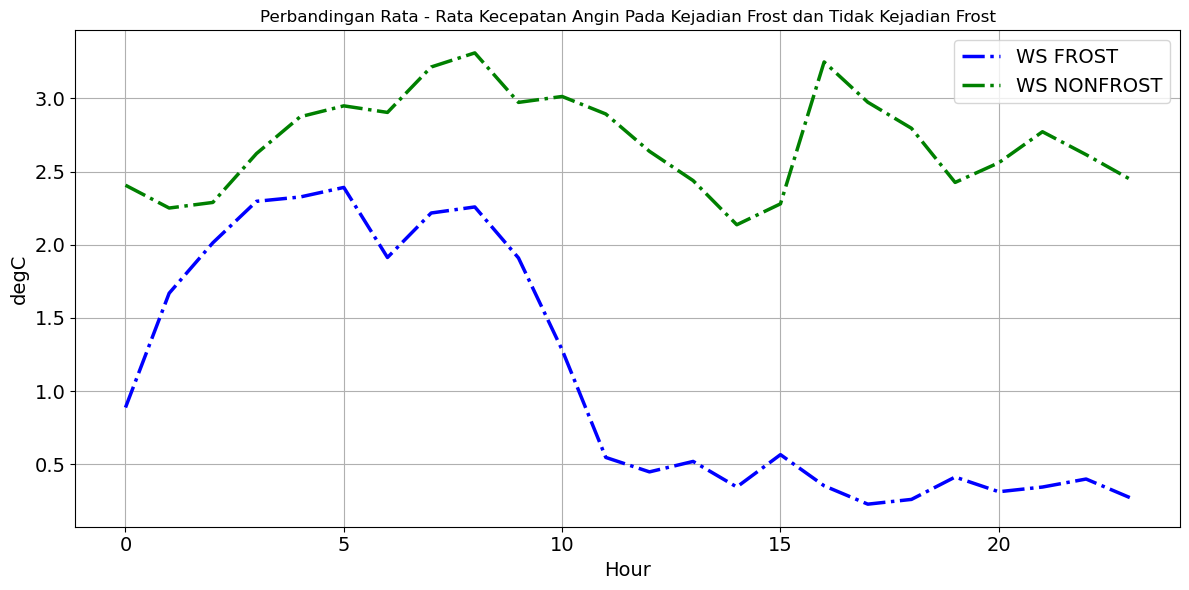

In [143]:
plt.figure(figsize=(12, 6))
plt.plot(selected_data_avg1['Hour'], result['Row_Averages'], label=f'WS FROST', color='b', linestyle='-.', lw=2.5)
plt.plot(selected_data_avg1['Hour'], result1['Row_Averages'], label=f'WS NONFROST', color='g', linestyle='-.', lw=2.5)
# Customize the plot
plt.title('Perbandingan Rata - Rata Kecepatan Angin Pada Kejadian Frost dan Tidak Kejadian Frost')
plt.xlabel('Hour', fontsize=14)
plt.ylabel('degC', fontsize=14)
plt.grid(True)
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Show the plot
#plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure all elements fit within the figure area
plt.show()

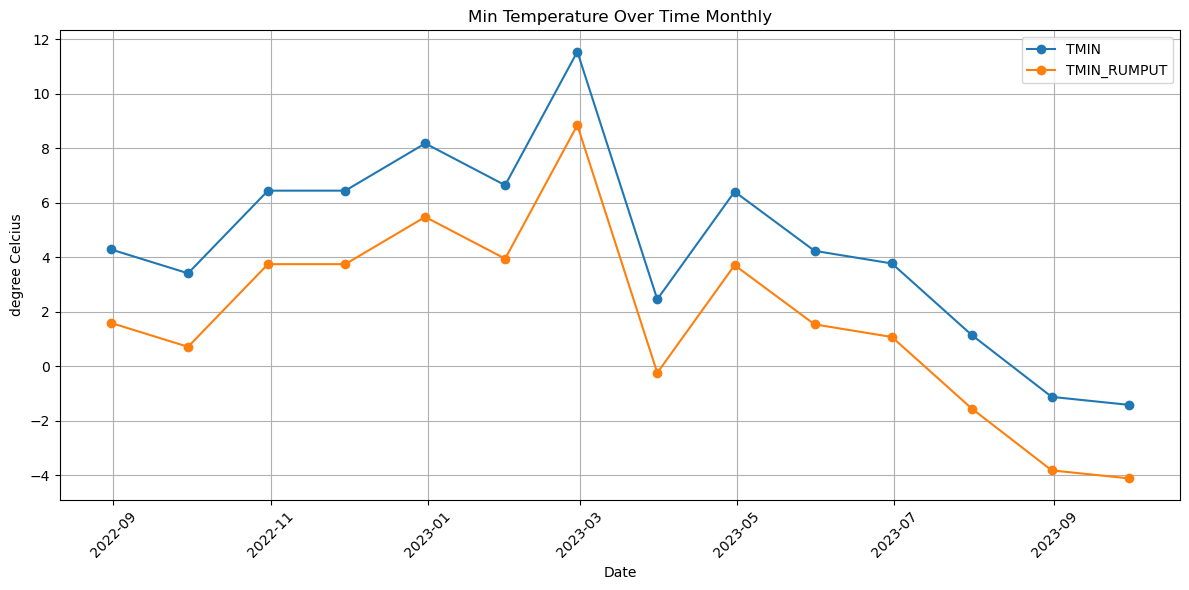

In [ ]:
data1 = df_extrapolate[['TT AIR MIN']].resample('M').min()
data2 = df_extrapolate[['TT AIR MIN GRASS']].resample('M').min()


# Select a specific time range (e.g., from '2023-01-03' to '2023-01-07')
# Define the range of dates and hours
# start_datetime = '2023-08-25 00:00:00'
# end_datetime = '2023-09-29 04:00:00'
# data1 = data1[start_datetime:end_datetime]
# data2 = data2[start_datetime:end_datetime]

# Create a figure
plt.figure(figsize=(12, 6))
# Plot the DataFrame, including the index
#plt.plot(df1_tmin_1.index, df1_tmin_1['TT AIR MIN'], label='TMIN')
plt.plot(data1.index, data1['TT AIR MIN'], label='TMIN', marker='o')
plt.plot(data2.index, data2['TT AIR MIN GRASS'], label='TMIN_RUMPUT', marker='o')


# Customize the plot
plt.title('Min Temperature Over Time Monthly')
plt.xlabel('Date')
plt.ylabel('degree Celcius')
plt.grid(True)
plt.legend()

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure all elements fit within the figure area
plt.show()



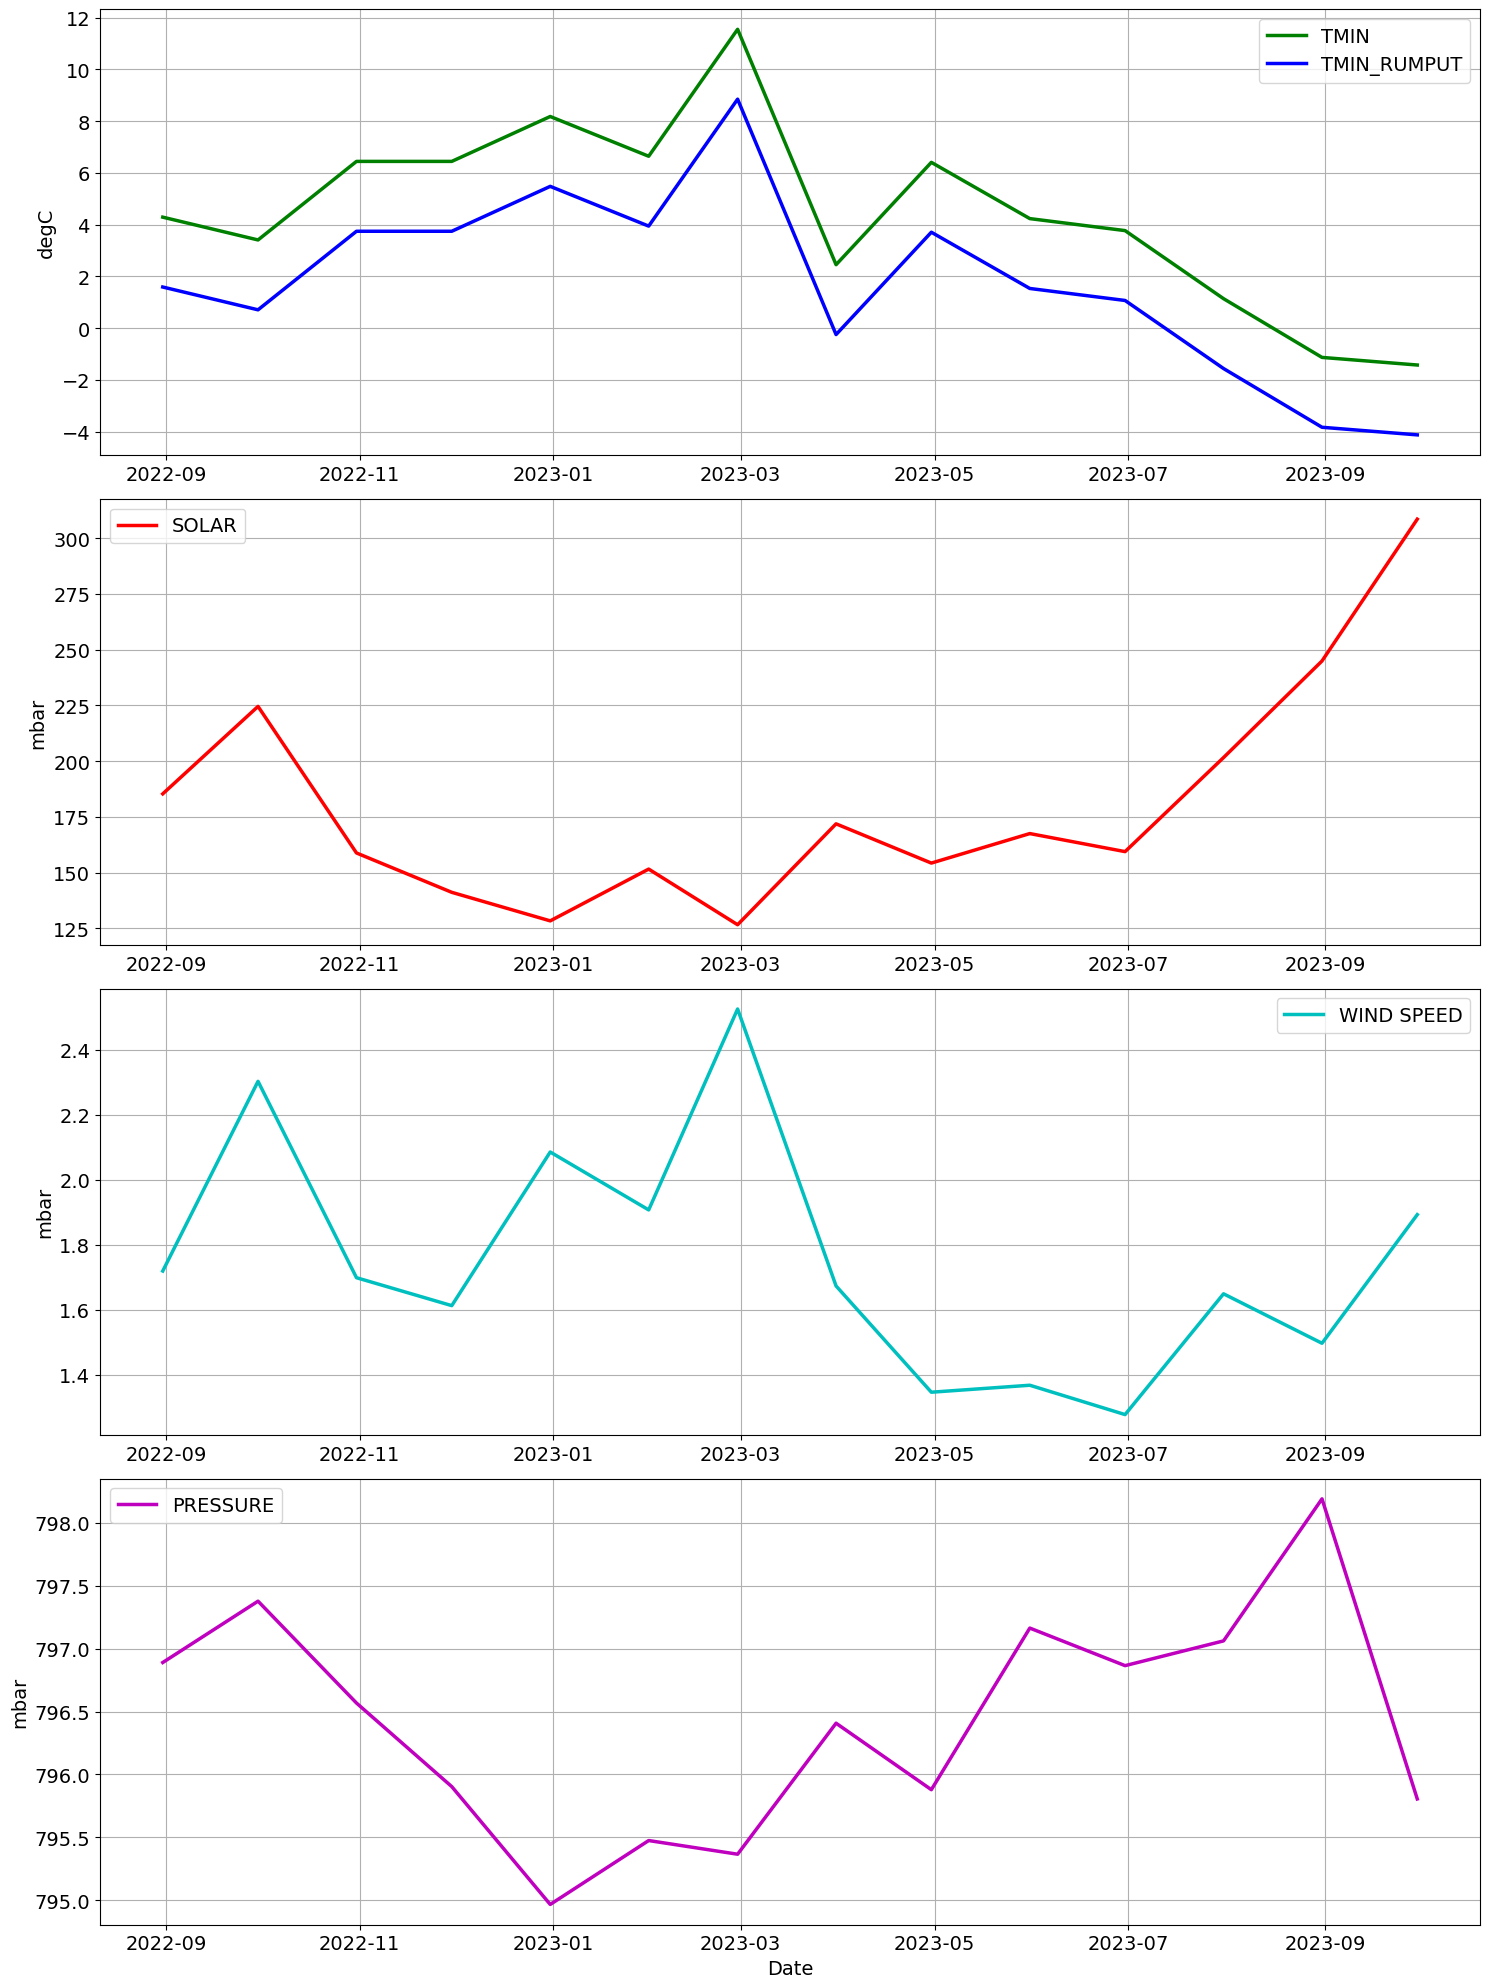

In [62]:
data1 = df_extrapolate[['TT AIR MIN']].resample('M').min()
data2 = df_extrapolate[['TT AIR MIN GRASS']].resample('M').min()
data3 = df_extrapolate[['SR AVG']].resample('M').mean()
#data4 = df_extrapolate[['WD AVG']].resample('D').min()
data5 = df_extrapolate[['WS AVG']].resample('M').mean()
data6 = df_extrapolate[['PP AIR']].resample('M').mean()


# Select a specific time range (e.g., from '2023-01-03' to '2023-01-07')
# Define the range of dates and hours
# start_datetime = '2023-08-25 00:00:00'
# end_datetime = '2023-09-29 04:00:00'
# data1 = data1[start_datetime:end_datetime]
# data2 = data2[start_datetime:end_datetime]

# Create a figure
plt.figure(figsize=(15, 20))
# Plot the DataFrame, including the index
#plt.plot(df1_tmin_1.index, df1_tmin_1['TT AIR MIN'], label='TMIN')
# plt.subplot(5, 1, 1)
# plt.plot(data1.index, data1['TT AIR MIN'], label='TMIN', color='g')

# # Customize the plot
# plt.title('Climagram Monthly')
# plt.xlabel('Date')
# plt.ylabel('degree Celcius')
# plt.grid(True)
# plt.legend()


plt.subplot(4, 1, 1)
plt.plot(data1.index, data1['TT AIR MIN'], label='TMIN', color='g', lw=2.5)
plt.plot(data2.index, data2['TT AIR MIN GRASS'], label='TMIN_RUMPUT', color='b', lw=2.5)

# Customize the plot
#plt.title('Min Temperature Over Time Daily')
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('degC', fontsize=14)

plt.legend(fontsize=14)


plt.subplot(4, 1, 2)
plt.plot(data3.index, data3['SR AVG'], label='SOLAR', color='r', lw=2.5)
# Customize the plot
#plt.title('Min Temperature Over Time Daily')
#plt.ylabel('degree Celcius')
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('mbar', fontsize=14)

plt.legend(fontsize=14)

plt.subplot(4, 1, 3)
plt.plot(data5.index, data5['WS AVG'], label='WIND SPEED', color='c', lw=2.5)
# Customize the plot
#plt.title('Min Temperature Over Time Daily')
#plt.ylabel('degree Celcius')
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('mbar', fontsize=14)

plt.legend(fontsize=14)

plt.subplot(4, 1, 4)
plt.plot(data6.index, data6['PP AIR'], label='PRESSURE', color='m', lw=2.5)
# Customize the plot
#plt.title('Min Temperature Over Time Daily')
plt.xlabel('Date')
#plt.ylabel('degree Celcius')
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('mbar', fontsize=14)

plt.legend(fontsize=14)
plt.xlabel('Date', fontsize=14)


# Show the plot
#plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure all elements fit within the figure area
plt.show()




# # Creating a subplot with 2 rows, 1 column, and working on the first subplot
# plt.subplot(2, 1, 1)
# plt.plot(x, y1, label='Sin(x)')
# plt.title('First Subplot')
# plt.legend()

# # Creating a subplot with 2 rows, 1 column, and working on the second subplot
# plt.subplot(2, 1, 2)
# plt.plot(x, y2, label='Cos(x)')
# plt.title('Second Subplot')
# plt.legend()

# # Adjust layout for better spacing
# plt.tight_layout()

# # Display the plot
# plt.show()


# EXTRAPOLATE1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_csv("extrapolate1.csv", sep=';')
df2 = pd.read_csv("extrapolate2.csv", sep=';')

# Convert the 'date' column to datetime
df1['TANGGAL'] = pd.to_datetime(df1['TANGGAL'])
df2['TANGGAL'] = pd.to_datetime(df2['TANGGAL'], format='%d/%m/%Y %H:%M')


df1.set_index('TANGGAL', inplace=True)
df2.set_index('TANGGAL', inplace=True)


In [ ]:
df1

TT AIR MIN  TT AIR MIN GRASS   SR AVG  WD AVG  \
TANGGAL                                                                    
2022-08-05 09:50:00+00:00       15.18             12.48    84.70   208.6   
2022-08-05 10:00:00+00:00       15.09             12.39    74.56   175.2   
2022-08-05 10:10:00+00:00       14.69             11.99    44.77   192.2   
2022-08-05 10:20:00+00:00       14.23             11.53    22.31   137.3   
2022-08-05 10:30:00+00:00       13.68             10.98    10.80   148.3   
...                               ...               ...      ...     ...   
2023-09-05 03:20:00+00:00       14.16             11.46  1005.00   300.6   
2023-09-05 03:30:00+00:00       14.16             11.46   703.30   207.1   
2023-09-05 03:40:00+00:00       14.16             11.46   588.70   155.8   
2023-09-05 03:50:00+00:00       14.16             11.46   875.00   313.5   
2023-09-05 04:00:00+00:00       14.16             11.46  1087.00   219.1   

                           WS AVG    PP AIR  
TANGGAL                                      
2022-08-05 09:50:00+00:00   0.345  796.2658  
2022-08-05 10:00:00+00:00   1.662  796.3821  
2022-08-05 10:10:00+00:00   1.476  796.3670  
2022-08-05 10:20:00+00:00   0.780  796.3774  
2022-08-05 10:30:00+00:00   0.758  796.4604  
...                           ...       ...  
2023-09-05 03:20:00+00:00   3.793  797.3772  
2023-09-05 03:30:00+00:00   3.289  797.3764  
2023-09-05 03:40:00+00:00   3.021  797.3763  
2023-09-05 03:50:00+00:00   3.133  797.3602  
2023-09-05 04:00:00+00:00   3.600  797.3338  

[54537 rows x 6 columns]

In [ ]:
df2

TT AIR MIN  TT AIR MIN GRASS    SR AVG  WD AVG    WS AVG  \
TANGGAL                                                                         
2023-09-05 04:01:00       17.44             12.89  1124.514   324.6  3.022275   
2023-09-05 04:02:00       17.81             12.89  1135.394   331.0  3.895208   
2023-09-05 04:03:00       17.81             12.89  1112.170   344.8  3.530650   
2023-09-05 04:04:00       17.50             12.89  1116.918   344.6  3.557669   
2023-09-05 04:05:00       17.35             12.89  1144.042   330.6  3.519074   
...                         ...               ...       ...     ...       ...   
2023-09-27 04:18:00       18.44             13.17  1133.376    98.6  6.485205   
2023-09-27 04:19:00       18.06             13.17  1129.991   146.6  5.609155   
2023-09-27 04:20:00       17.93             13.17  1129.903   109.5  4.882663   
2023-09-27 04:21:00       17.83             13.17  1128.469    97.1  6.419691   
2023-09-27 04:22:00       17.99             13.17  1132.114   103.4  7.427126   

                       PP AIR  
TANGGAL                        
2023-09-05 04:01:00  797.3732  
2023-09-05 04:02:00  797.2949  
2023-09-05 04:03:00  797.3758  
2023-09-05 04:04:00  797.2938  
2023-09-05 04:05:00  797.2947  
...                       ...  
2023-09-27 04:18:00  797.8069  
2023-09-27 04:19:00  797.8065  
2023-09-27 04:20:00  797.8043  
2023-09-27 04:21:00  797.8032  
2023-09-27 04:22:00  797.8798  

[31680 rows x 6 columns]

In [ ]:
result = pd.concat([df1,df2])
result

TT AIR MIN  TT AIR MIN GRASS    SR AVG  WD AVG  \
TANGGAL                                                                     
2022-08-05 09:50:00+00:00       15.18             12.48    84.700   208.6   
2022-08-05 10:00:00+00:00       15.09             12.39    74.560   175.2   
2022-08-05 10:10:00+00:00       14.69             11.99    44.770   192.2   
2022-08-05 10:20:00+00:00       14.23             11.53    22.310   137.3   
2022-08-05 10:30:00+00:00       13.68             10.98    10.800   148.3   
...                               ...               ...       ...     ...   
2023-09-27 04:18:00             18.44             13.17  1133.376    98.6   
2023-09-27 04:19:00             18.06             13.17  1129.991   146.6   
2023-09-27 04:20:00             17.93             13.17  1129.903   109.5   
2023-09-27 04:21:00             17.83             13.17  1128.469    97.1   
2023-09-27 04:22:00             17.99             13.17  1132.114   103.4   

                             WS AVG    PP AIR  
TANGGAL                                        
2022-08-05 09:50:00+00:00  0.345000  796.2658  
2022-08-05 10:00:00+00:00  1.662000  796.3821  
2022-08-05 10:10:00+00:00  1.476000  796.3670  
2022-08-05 10:20:00+00:00  0.780000  796.3774  
2022-08-05 10:30:00+00:00  0.758000  796.4604  
...                             ...       ...  
2023-09-27 04:18:00        6.485205  797.8069  
2023-09-27 04:19:00        5.609155  797.8065  
2023-09-27 04:20:00        4.882663  797.8043  
2023-09-27 04:21:00        6.419691  797.8032  
2023-09-27 04:22:00        7.427126  797.8798  

[86217 rows x 6 columns]

In [ ]:
result

TT AIR MIN  TT AIR MIN GRASS    SR AVG  WD AVG  \
TANGGAL                                                                     
2022-08-05 09:50:00+00:00       15.18             12.48    84.700   208.6   
2022-08-05 10:00:00+00:00       15.09             12.39    74.560   175.2   
2022-08-05 10:10:00+00:00       14.69             11.99    44.770   192.2   
2022-08-05 10:20:00+00:00       14.23             11.53    22.310   137.3   
2022-08-05 10:30:00+00:00       13.68             10.98    10.800   148.3   
...                               ...               ...       ...     ...   
2023-09-27 04:18:00             18.44             13.17  1133.376    98.6   
2023-09-27 04:19:00             18.06             13.17  1129.991   146.6   
2023-09-27 04:20:00             17.93             13.17  1129.903   109.5   
2023-09-27 04:21:00             17.83             13.17  1128.469    97.1   
2023-09-27 04:22:00             17.99             13.17  1132.114   103.4   

                             WS AVG    PP AIR  
TANGGAL                                        
2022-08-05 09:50:00+00:00  0.345000  796.2658  
2022-08-05 10:00:00+00:00  1.662000  796.3821  
2022-08-05 10:10:00+00:00  1.476000  796.3670  
2022-08-05 10:20:00+00:00  0.780000  796.3774  
2022-08-05 10:30:00+00:00  0.758000  796.4604  
...                             ...       ...  
2023-09-27 04:18:00        6.485205  797.8069  
2023-09-27 04:19:00        5.609155  797.8065  
2023-09-27 04:20:00        4.882663  797.8043  
2023-09-27 04:21:00        6.419691  797.8032  
2023-09-27 04:22:00        7.427126  797.8798  

[86217 rows x 6 columns]

In [ ]:
# Assuming your DataFrame is named 'df'
# Use the reset_index method to move the current index to a column
result.reset_index(inplace=True)

# Display the modified DataFrame
print(result)

                         TANGGAL  TT AIR MIN  TT AIR MIN GRASS    SR AVG  \
0      2022-08-05 09:50:00+00:00       15.18             12.48    84.700   
1      2022-08-05 10:00:00+00:00       15.09             12.39    74.560   
2      2022-08-05 10:10:00+00:00       14.69             11.99    44.770   
3      2022-08-05 10:20:00+00:00       14.23             11.53    22.310   
4      2022-08-05 10:30:00+00:00       13.68             10.98    10.800   
...                          ...         ...               ...       ...   
86212        2023-09-27 04:18:00       18.44             13.17  1133.376   
86213        2023-09-27 04:19:00       18.06             13.17  1129.991   
86214        2023-09-27 04:20:00       17.93             13.17  1129.903   
86215        2023-09-27 04:21:00       17.83             13.17  1128.469   
86216        2023-09-27 04:22:00       17.99             13.17  1132.114   

       WD AVG    WS AVG    PP AIR  
0       208.6  0.345000  796.2658  
1       175.2  

In [ ]:
result

TANGGAL  TT AIR MIN  TT AIR MIN GRASS    SR AVG  \
0      2022-08-05 09:50:00+00:00       15.18             12.48    84.700   
1      2022-08-05 10:00:00+00:00       15.09             12.39    74.560   
2      2022-08-05 10:10:00+00:00       14.69             11.99    44.770   
3      2022-08-05 10:20:00+00:00       14.23             11.53    22.310   
4      2022-08-05 10:30:00+00:00       13.68             10.98    10.800   
...                          ...         ...               ...       ...   
86212        2023-09-27 04:18:00       18.44             13.17  1133.376   
86213        2023-09-27 04:19:00       18.06             13.17  1129.991   
86214        2023-09-27 04:20:00       17.93             13.17  1129.903   
86215        2023-09-27 04:21:00       17.83             13.17  1128.469   
86216        2023-09-27 04:22:00       17.99             13.17  1132.114   

       WD AVG    WS AVG    PP AIR  
0       208.6  0.345000  796.2658  
1       175.2  1.662000  796.3821  
2       192.2  1.476000  796.3670  
3       137.3  0.780000  796.3774  
4       148.3  0.758000  796.4604  
...       ...       ...       ...  
86212    98.6  6.485205  797.8069  
86213   146.6  5.609155  797.8065  
86214   109.5  4.882663  797.8043  
86215    97.1  6.419691  797.8032  
86216   103.4  7.427126  797.8798  

[86217 rows x 7 columns]

In [ ]:
result

TANGGAL  TT AIR MIN  TT AIR MIN GRASS    SR AVG  \
0      2022-08-05 09:50:00+00:00       15.18             12.48    84.700   
1      2022-08-05 10:00:00+00:00       15.09             12.39    74.560   
2      2022-08-05 10:10:00+00:00       14.69             11.99    44.770   
3      2022-08-05 10:20:00+00:00       14.23             11.53    22.310   
4      2022-08-05 10:30:00+00:00       13.68             10.98    10.800   
...                          ...         ...               ...       ...   
86212        2023-09-27 04:18:00       18.44             13.17  1133.376   
86213        2023-09-27 04:19:00       18.06             13.17  1129.991   
86214        2023-09-27 04:20:00       17.93             13.17  1129.903   
86215        2023-09-27 04:21:00       17.83             13.17  1128.469   
86216        2023-09-27 04:22:00       17.99             13.17  1132.114   

       WD AVG    WS AVG    PP AIR  
0       208.6  0.345000  796.2658  
1       175.2  1.662000  796.3821  
2       192.2  1.476000  796.3670  
3       137.3  0.780000  796.3774  
4       148.3  0.758000  796.4604  
...       ...       ...       ...  
86212    98.6  6.485205  797.8069  
86213   146.6  5.609155  797.8065  
86214   109.5  4.882663  797.8043  
86215    97.1  6.419691  797.8032  
86216   103.4  7.427126  797.8798  

[86217 rows x 7 columns]

In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'result'
# Convert 'TANGGAL' to datetime if it's not already
result['TANGGAL'] = pd.to_datetime(result['TANGGAL'], format=('%Y%m%d %H%M'))

# Convert 'TANGGAL' to the desired format "yyyymmdd hhMM"
result['formatted_index'] = result['TANGGAL'].dt.strftime('%Y%m%d %H%M')

# Set the new column as the index
# result.set_index('formatted_index', inplace=True)

# Display the modified DataFrame
print(result)


ValueError: Cannot mix tz-aware with tz-naive values, at position 54537. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.